### Introducción al Proyecto de Machine Learning: Predicción del Desempeño Estudiantil

El desempeño académico de los estudiantes está influenciado por una combinación de factores personales, sociales y escolares. Este proyecto tiene como objetivo desarrollar un modelo de aprendizaje automático (machine learning) capaz de predecir la calificación final (G3) de los estudiantes utilizando información disponible antes del cierre del curso. Para hacer el modelo más realista y útil, se excluyen las calificaciones intermedias (G1 y G2), ya que estas están directamente correlacionadas con la nota final y harían la predicción trivial.

---

### Problema

El problema a resolver es: **¿Podemos predecir la calificación final de un estudiante utilizando características personales, sociales y académicas disponibles al inicio del curso?**

El modelo no solo será útil para estimar el rendimiento de los estudiantes, sino también para identificar factores clave que influyen en el éxito académico, permitiendo intervenciones tempranas en casos de bajo desempeño.

---

### Objetivo

El objetivo principal es entrenar un modelo que prediga con precisión la calificación final de los estudiantes (G3) basándose en:

- **Características demográficas**: edad, género, tipo de dirección.
- **Factores familiares**: nivel educativo de los padres, calidad de relaciones familiares.
- **Hábitos de estudio**: tiempo de estudio semanal, actividades extracurriculares.
- **Variables sociales y de estilo de vida**: tiempo libre, consumo de alcohol, salud.

Esto excluirá G1 y G2, las notas de los períodos anteriores, para evitar que el modelo dependa de estas evaluaciones previas.

---

### Alcance

1. **Preparación de los datos**: Limpieza y transformación de las variables, incluyendo la codificación de datos categóricos y la eliminación de G1 y G2.
2. **Análisis exploratorio**: Estudio de las correlaciones entre las características y el rendimiento académico (G3).
3. **Entrenamiento del modelo**: Uso de algoritmos de machine learning como regresión lineal, bosques aleatorios o redes neuronales.
4. **Evaluación del modelo**: Análisis del desempeño utilizando métricas como el error cuadrático medio (MSE) y el coeficiente de determinación (R²).
5. **Interpretación**: Identificación de los factores más relevantes que influyen en el desempeño académico.

---

### Importancia del Proyecto

Este modelo puede ser aplicado en el ámbito educativo para:

- **Detectar estudiantes en riesgo**: Identificar a tiempo a los estudiantes con posibles problemas de rendimiento y diseñar estrategias personalizadas para mejorar su desempeño.
- **Optimizar recursos educativos**: Ayudar a los centros educativos a comprender qué factores tienen mayor impacto en el aprendizaje.
- **Generar conocimiento sobre el aprendizaje**: Ofrecer una visión más profunda sobre cómo los hábitos, el entorno y los recursos afectan el éxito académico.

---



### Variables Personales

- **school**: Escuela del estudiante (GP = Gabriel Pereira, MS = Mousinho da Silveira).
- **sex**: Género del estudiante (F = femenino, M = masculino).
- **age**: Edad del estudiante (15 a 22 años).
- **address**: Tipo de dirección del hogar (U = urbana, R = rural).
- **famsize**: Tamaño de la familia (LE3 = menor o igual a 3, GT3 = mayor a 3).
- **Pstatus**: Estado de convivencia de los padres (T = juntos, A = separados).

### Información de los Padres

- **Medu**: Nivel educativo de la madre (0 = ninguno a 4 = educación superior).
- **Fedu**: Nivel educativo del padre (0 = ninguno a 4 = educación superior).
- **Mjob**: Profesión de la madre ('teacher', 'health', 'services', 'at_home', 'other').
- **Fjob**: Profesión del padre ('teacher', 'health', 'services', 'at_home', 'other').

### Factores Escolares

- **reason**: Razón para elegir la escuela ('home', 'reputation', 'course', 'other').
- **guardian**: Tutor del estudiante ('mother', 'father', 'other').
- **traveltime**: Tiempo de viaje al colegio (1 = <15 min, 2 = 15-30 min, 3 = 30-60 min, 4 = >1 hora).
- **studytime**: Tiempo de estudio semanal (1 = <2 horas, 4 = >10 horas).
- **failures**: Número de materias reprobadas anteriormente (0 a 4).
- **schoolsup**: Apoyo educativo adicional (yes, no).
- **famsup**: Apoyo educativo familiar (yes, no).
- **paid**: Clases pagadas adicionales (yes, no).
- **activities**: Participación en actividades extracurriculares (yes, no).
- **nursery**: Asistió a guardería (yes, no).
- **higher**: Desea cursar educación superior (yes, no).
- **internet**: Acceso a internet en casa (yes, no).
- **romantic**: En una relación romántica (yes, no).

### Factores Sociales y de Estilo de Vida

- **famrel**: Calidad de las relaciones familiares (1 = muy mala, 5 = excelente).
- **freetime**: Tiempo libre después de la escuela (1 = muy bajo, 5 = muy alto).
- **goout**: Frecuencia de salir con amigos (1 = muy baja, 5 = muy alta).
- **Dalc**: Consumo de alcohol entre semana (1 = muy bajo, 5 = muy alto).
- **Walc**: Consumo de alcohol en fin de semana (1 = muy bajo, 5 = muy alto).
- **health**: Estado de salud actual (1 = muy malo, 5 = muy bueno).
- **absences**: Número de ausencias escolares (0 a 93).

### Notas

- **G1**: Nota del primer período (0 a 20).
- **G2**: Nota del segundo período (0 a 20).
- **G3**: Nota final (0 a 20, objetivo a predecir).

Importem les llibreries neceasries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RF, GradientBoostingRegressor as GB, AdaBoostRegressor as AB
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder,PolynomialFeatures
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import PowerTransformer



Carreguem el datset 

In [44]:
# 2. Carga del Dataset
# Cargar el archivo CSV
file_path = 'student-mat.csv'  
df = pd.read_csv(file_path)

# Mostrar las primeras filas del dataset
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Exploracio inicial del dataset


In [46]:
# Información del dataset
df.info()

# Diccionario para mapear valores categóricos binarios
bin_map = {
    'yes': 1, 'no': 0,
    'GP': 1, 'MS': 0,
    'F': 1, 'M': 0,
    'U': 1, 'R': 0,
    'LE3': 0, 'GT3': 1,
    'T': 1, 'A': 0
}

# Lista de columnas categóricas binarias
cat_cols = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 
            'higher', 'internet', 'romantic']

# Aplicar mapeo binario solo a columnas con valores válidos
for col in cat_cols:
    if col in df.columns:
        unique_vals = df[col].unique()
        if all(val in bin_map for val in unique_vals):
            df[col] = df[col].map(bin_map)
        else:
            print(f"Columna {col} contiene valores no mapeados: {unique_vals}")

# Codificar columnas categóricas con más de dos valores
multi_cat_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian']
label_encoders = {}
for col in multi_cat_cols:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

# Verificar valores únicos en cada columna categórica procesada
for col in cat_cols + multi_cat_cols:
    if col in df.columns:
        print(f"{col}: {df[col].unique()}")

# Limpieza de columnas categóricas restantes
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace("'", "").str.strip()

# Asegurarse de que todas las columnas son numéricas o categorizadas correctamente
numeric_df = df.select_dtypes(include=['number'])




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    int64 
 1   sex         395 non-null    int64 
 2   age         395 non-null    int64 
 3   address     395 non-null    int64 
 4   famsize     395 non-null    int64 
 5   Pstatus     395 non-null    int64 
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    int64 
 9   Fjob        395 non-null    int64 
 10  reason      395 non-null    int64 
 11  guardian    395 non-null    int64 
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    int64 
 16  famsup      395 non-null    int64 
 17  paid        395 non-null    int64 
 18  activities  395 non-null    int64 
 19  nursery     395 non-null    int64 
 20  higher    

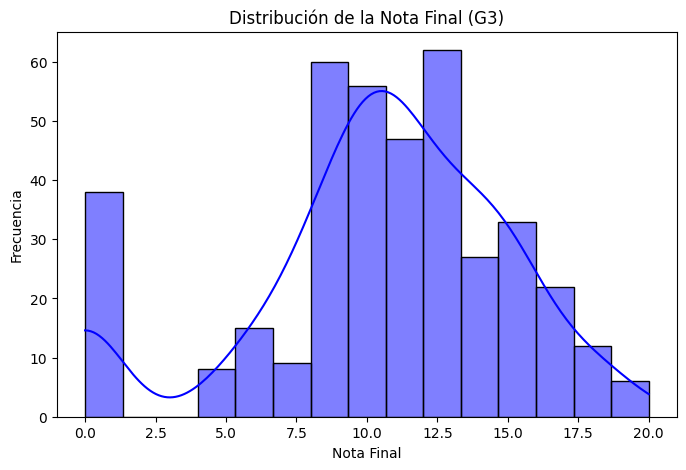

In [4]:
# Distribución de la variable objetivo (G3)
plt.figure(figsize=(8, 5))
sns.histplot(df['G3'], kde=True, bins=15, color='blue')
plt.title('Distribución de la Nota Final (G3)')
plt.xlabel('Nota Final')
plt.ylabel('Frecuencia')
plt.show()


Distribución bimodal con concentración principal en valores medios:

·La distribución no es perfectamente normal y parece presentar dos picos principales:
    - Uno alrededor de 0.
    -Otro entre 10 y 15.

·Esto sugiere que podría haber dos grupos distintos de estudiantes:
    Un grupo con muy bajo rendimiento (notas cercanas a 0).
    Otro grupo que logra un rendimiento promedio o superior (10 a 15).

·Presencia de estudiantes con notas extremas:
    Se observa una pequeña proporción de estudiantes con G3 entre 15 y 20, indicando un número reducido de estudiantes con rendimiento excepcional.
    Del mismo modo, hay un grupo considerable que tiene G3 = 0, lo que podría ser estudiantes que no aprobaron o no completaron el curso.

·Asimetría leve hacia las notas bajas:
    Aunque el centro principal de la distribución está entre 10-12, el segundo pico alrededor de 0 genera una asimetría hacia los valores bajos.
    Esto podría deberse a factores externos como dificultades académicas, problemas familiares, o falta de compromiso.

Posibles preguntas de análisis:
¿Por qué hay tantos estudiantes con G3 = 0?

¿Hay factores específicos, como las ausencias o los fracasos académicos, que estén correlacionados con este rendimiento extremadamente bajo?
¿Cuál es la relación entre los dos picos observados?

¿Existen características (por ejemplo, tiempo de estudio, apoyo familiar, o hábitos de consumo de alcohol) que separen a los estudiantes en estos dos grupos principales?
¿Cómo afecta esta distribución al modelo?

Dado que hay una concentración de valores en 0, es posible que esto afecte negativamente a los modelos , ya que podrían sobreajustarse a este valor.

Siguientes pasos sugeridos para el análisis de datos:
Separar a los estudiantes con G3 = 0:

Examina si este grupo tiene características únicas y decide si deben manejarse de manera especial (por ejemplo, tratarlos como un caso separado o eliminarlos en algunos análisis).
Investigar correlaciones con G3:

Determina qué variables están más relacionadas con las notas finales, especialmente para comprender la diferencia entre estudiantes de bajo y alto rendimiento.
Visualizar la relación entre variables clave y G3:

Usa gráficos como boxplots o scatterplots para entender cómo factores como absences, studytime, o failures influyen en G3.

In [5]:
# Separar estudiantes con G3 = 0
g3_zero = df[df['G3'] == 0]
g3_non_zero = df[df['G3'] != 0]

# Analizar estudiantes con G3 = 0
print("Número de estudiantes con G3 = 0:", len(g3_zero))
print(g3_zero.describe())

Número de estudiantes con G3 = 0: 38
          school        sex        age    address    famsize    Pstatus  \
count  38.000000  38.000000  38.000000  38.000000  38.000000  38.000000   
mean    0.105263   0.394737  17.078947   0.736842   0.184211   0.947368   
std     0.311012   0.495355   1.302421   0.446258   0.392859   0.226294   
min     0.000000   0.000000  15.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000  16.000000   0.250000   0.000000   1.000000   
50%     0.000000   0.000000  17.000000   1.000000   0.000000   1.000000   
75%     0.000000   1.000000  18.000000   1.000000   0.000000   1.000000   
max     1.000000   1.000000  19.000000   1.000000   1.000000   1.000000   

            Medu       Fedu       Mjob       Fjob  ...   romantic     famrel  \
count  38.000000  38.000000  38.000000  38.000000  ...  38.000000  38.000000   
mean    2.315789   2.289474   1.921053   2.289474  ...   0.526316   3.842105   
std     1.016227   1.112773   1.302421   0.9273

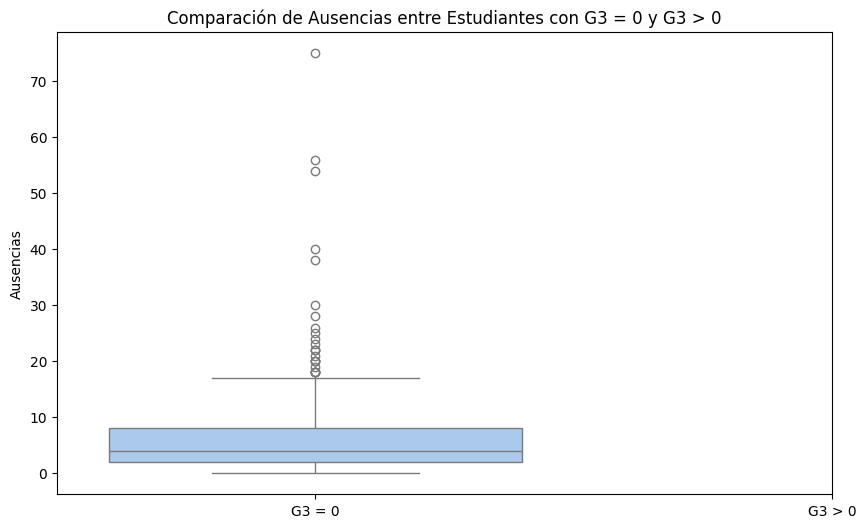

In [6]:
# Visualizar diferencias entre estudiantes con G3 = 0 y G3 > 0
plt.figure(figsize=(10, 6))
sns.boxplot(data=[g3_zero['absences'], g3_non_zero['absences']], palette='pastel')
plt.xticks([0, 1], ['G3 = 0', 'G3 > 0'])
plt.title('Comparación de Ausencias entre Estudiantes con G3 = 0 y G3 > 0')
plt.ylabel('Ausencias')
plt.show()

Los estudiantes con G3 > 0 presentan una mayor variabilidad en las ausencias. Algunos incluso tienen valores extremos (más de 30 o 40 ausencias), mientras que los estudiantes con G3 = 0 tienen 0 ausencias.
Esto indica que las ausencias por sí solas no son un predictor fuerte de G3 = 0, ya que los estudiantes con bajo rendimiento no parecen faltar a clase, pero podrían estar enfrentando otros problemas (falta de estudio, bajas calificaciones previas, etc.).
Los valores extremos en el grupo G3 > 0 sugieren que algunos estudiantes con muchas ausencias logran aprobar, lo que podría relacionarse con otros factores como la calidad del tiempo de estudio.

/var/folders/fm/9pzntrns5_s8x46kp5sm9x240000gn/T/ipykernel_28205/2667571711.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='failures', y='G3', data=df, palette='pastel')


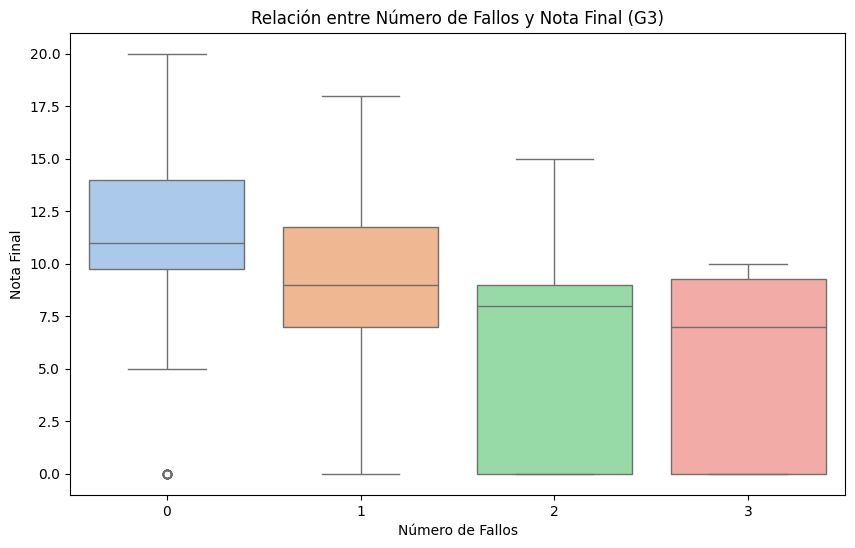

/var/folders/fm/9pzntrns5_s8x46kp5sm9x240000gn/T/ipykernel_28205/2667571711.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='studytime', y='G3', data=df, palette='pastel')


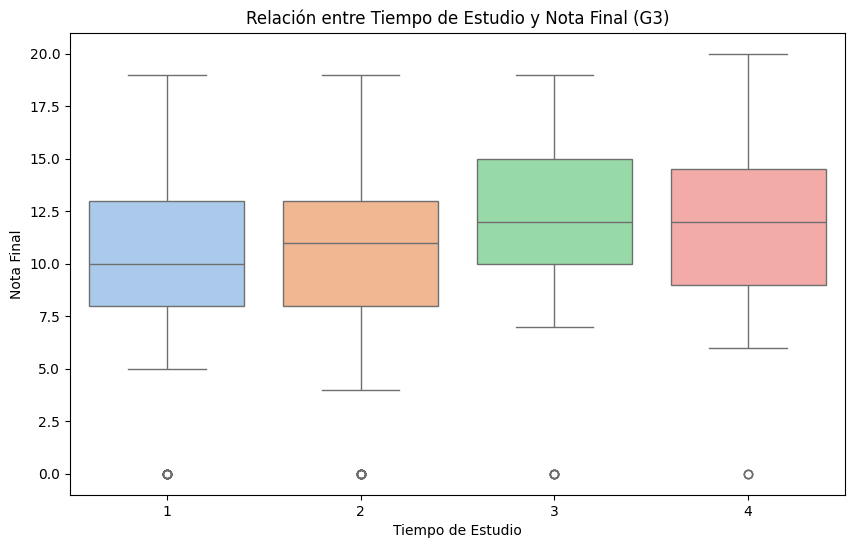

/var/folders/fm/9pzntrns5_s8x46kp5sm9x240000gn/T/ipykernel_28205/2667571711.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Walc', y='G3', data=df, palette='pastel')


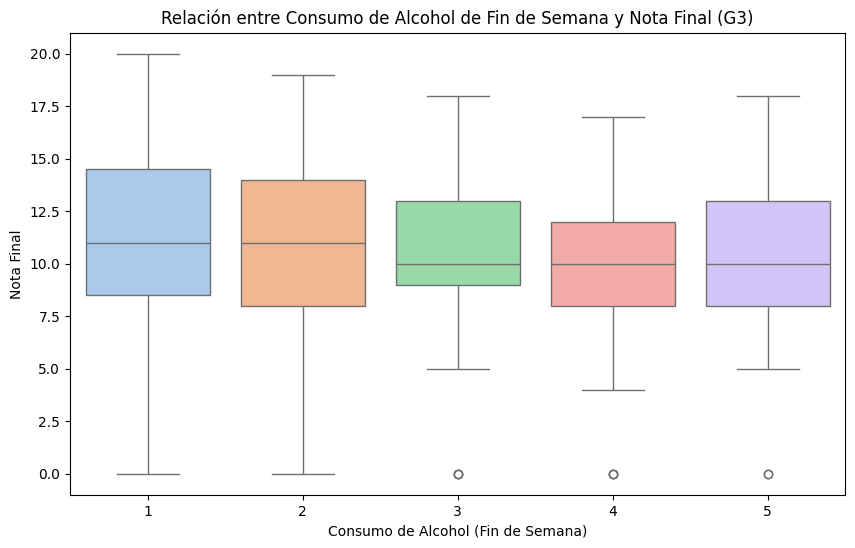

In [7]:
# Relación entre el número de fallos previos y G3
plt.figure(figsize=(10, 6))
sns.boxplot(x='failures', y='G3', data=df, palette='pastel')
plt.title('Relación entre Número de Fallos y Nota Final (G3)')
plt.xlabel('Número de Fallos')
plt.ylabel('Nota Final')
plt.show()

# Relación entre tiempo de estudio y G3
plt.figure(figsize=(10, 6))
sns.boxplot(x='studytime', y='G3', data=df, palette='pastel')
plt.title('Relación entre Tiempo de Estudio y Nota Final (G3)')
plt.xlabel('Tiempo de Estudio')
plt.ylabel('Nota Final')
plt.show()

# Relación entre consumo de alcohol y G3
plt.figure(figsize=(10, 6))
sns.boxplot(x='Walc', y='G3', data=df, palette='pastel')
plt.title('Relación entre Consumo de Alcohol de Fin de Semana y Nota Final (G3)')
plt.xlabel('Consumo de Alcohol (Fin de Semana)')
plt.ylabel('Nota Final')
plt.show()


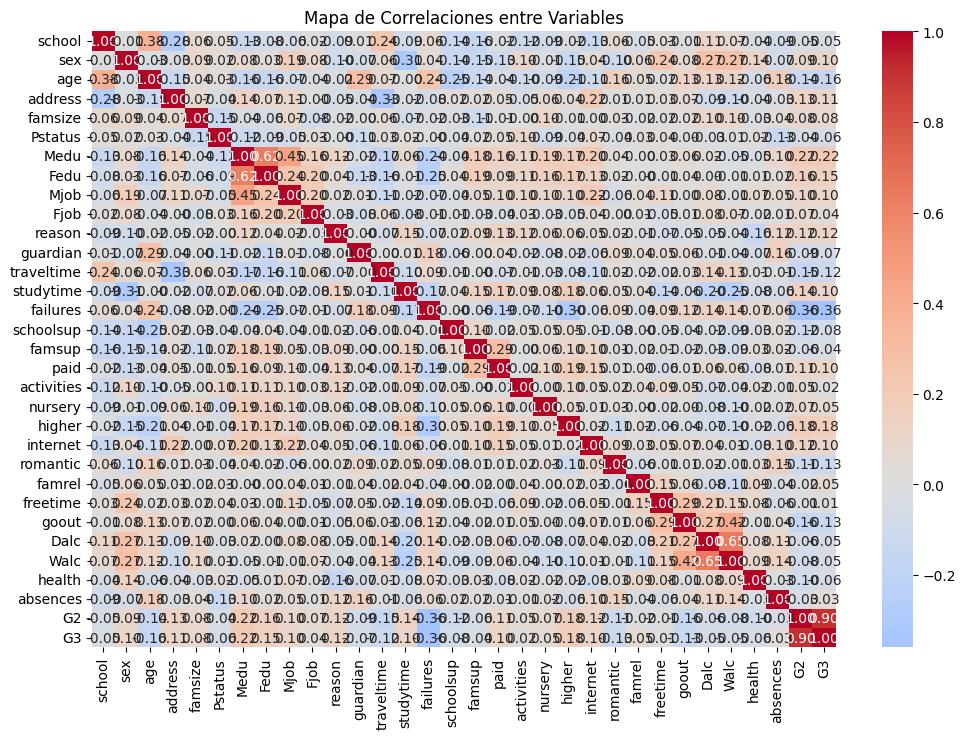

Variables más correlacionadas con G3:
G3            1.000000
G2            0.904868
Medu          0.217147
higher        0.182465
Fedu          0.152457
reason        0.121994
address       0.105756
sex           0.103456
Mjob          0.102082
paid          0.101996
internet      0.098483
studytime     0.097820
famsize       0.081407
nursery       0.051568
famrel        0.051363
Fjob          0.042286
absences      0.034247
activities    0.016100
freetime      0.011307
famsup       -0.039157
school       -0.045017
Walc         -0.051939
Dalc         -0.054660
Pstatus      -0.058009
health       -0.061335
guardian     -0.070109
schoolsup    -0.082788
traveltime   -0.117142
romantic     -0.129970
goout        -0.132791
age          -0.161579
failures     -0.360415
Name: G3, dtype: float64


In [8]:
# Generar la matriz de correlación
correlation_matrix = numeric_df.corr()

# Visualización del mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Mapa de Correlaciones entre Variables')
plt.show()

# Variables más correlacionadas con G3
if 'G3' in correlation_matrix.columns:
    correlated_features = correlation_matrix['G3'].sort_values(ascending=False)
    print("Variables más correlacionadas con G3:")
    print(correlated_features)
else:
    print("La columna G3 no está en las columnas numéricas procesadas.")



/var/folders/fm/9pzntrns5_s8x46kp5sm9x240000gn/T/ipykernel_28205/1555611664.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='G3', y='studytime', data=df, palette='pastel')


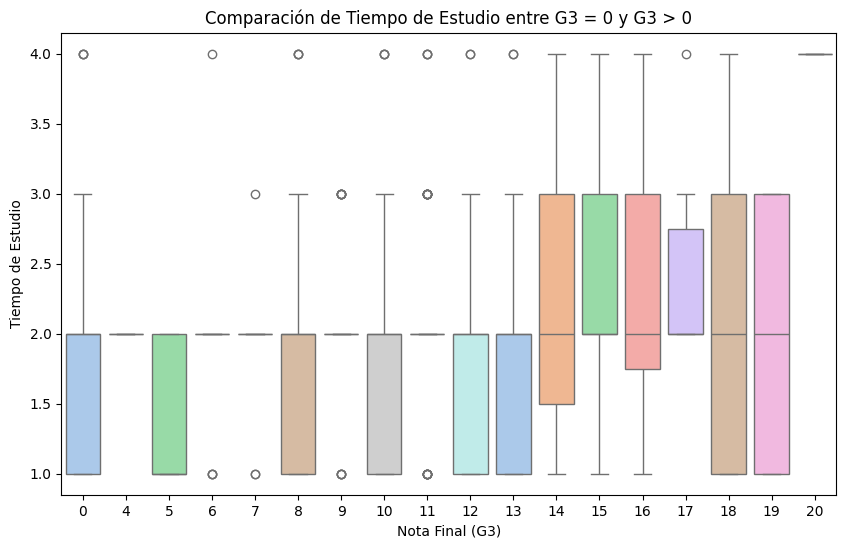

In [9]:
# Comparación entre G3 = 0 y G3 > 0 para studytime
plt.figure(figsize=(10, 6))
sns.boxplot(x='G3', y='studytime', data=df, palette='pastel')
plt.title('Comparación de Tiempo de Estudio entre G3 = 0 y G3 > 0')
plt.xlabel('Nota Final (G3)')
plt.ylabel('Tiempo de Estudio')
plt.show()


OUTLIERS:



Número de outliers por columna:
Medu         0
higher      20
Fedu         0
failures    16
age          2
goout        0
dtype: int64
Tamaño original del dataset: (395, 33)
Tamaño del dataset sin outliers: (365, 33)


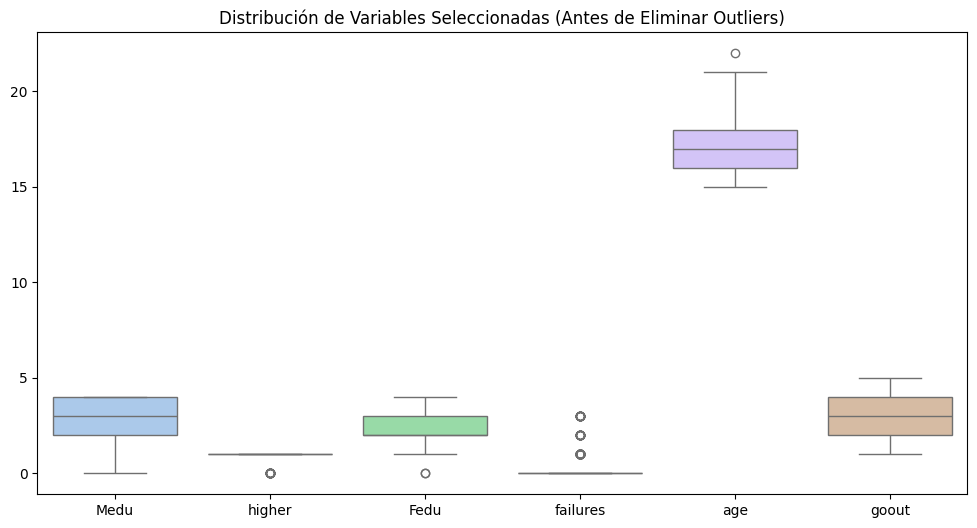

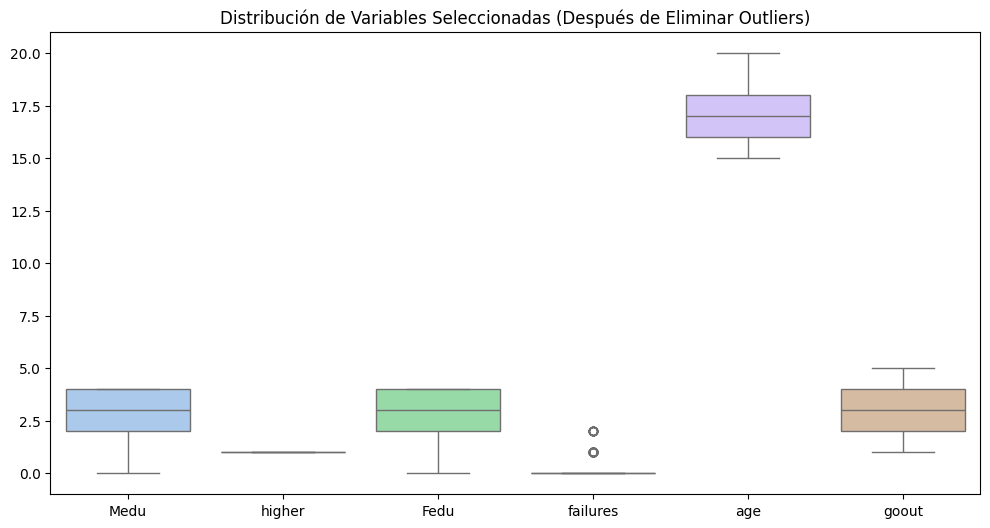

In [10]:
from scipy.stats import zscore

# Seleccionar las 6 variables más correlacionadas (positivas y negativas)
selected_columns = ['Medu', 'higher', 'Fedu', 'failures', 'age', 'goout']

# Calcular Z-scores para estas columnas
z_scores = df[selected_columns].apply(zscore)

# Definir un umbral para identificar outliers
threshold = 3 # Esto significa que solo el 0.3% de los datos estarán fuera de este rango, lo cual se considera raro y extremo.
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Contar y mostrar outliers por columna
print("Número de outliers por columna:")
print(outliers.sum())

# Crear un dataset sin outliers
df_no_outliers = df[(~outliers).all(axis=1)]

# Comparar tamaño del dataset antes y después de eliminar outliers
print(f"Tamaño original del dataset: {df.shape}")
print(f"Tamaño del dataset sin outliers: {df_no_outliers.shape}")

# Visualizar distribuciones antes y después de eliminar outliers
# Distribuciones antes
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[selected_columns], palette='pastel')
plt.title('Distribución de Variables Seleccionadas (Antes de Eliminar Outliers)')
plt.show()

# Distribuciones después
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers[selected_columns], palette='pastel')
plt.title('Distribución de Variables Seleccionadas (Después de Eliminar Outliers)')
plt.show()


In [11]:
# Separar variables (X: predictives, y: objectiu)
X = df.drop(['G3', 'G2', 'G1'], axis=1)
y = df['G3']

# Dividir entrenament i prova
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=1)

# Escalar dades
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X: Todas las columnas del dataset excepto la columna objetivo ('nota').
y: Solo la columna objetivo ('nota').

El conjunto de entrenamiento contiene el 85% de los datos.
El conjunto de prueba contiene el 15% restante.
random_state=1: Garantiza que la división sea reproducible.    15 por ciento de test


Escala los datos para que cada variable tenga media 0 y desviación estándar 1.
Es necesario para modelos sensibles a la escala de las variables (como SVM y regresión logística).


In [12]:
SEED=1

# Definir models
models = {
    'KNN': KNN(),
    'Decision Tree': DecisionTreeRegressor(),
    'ElasticNet': ElasticNet(),
    'Support Vector Regressor': SVR(),
    'Random Forest': RF(random_state=SEED),
    'Gradient Boosting': GB(random_state=SEED),
    'AdaBoost': AB(random_state=SEED),
    'Linear Regression': LinearRegression()
}

Incluye una variedad de enfoques (lineales, basados en proximidad, árboles y ensambles), lo que permite comparar cómo diferentes metodologías se adaptan al problema.
Los modelos seleccionados cubren tanto opciones sencillas (como Regresión Lineal) como avanzadas (Gradient Boosting y Random Forest), lo que permite identificar mejoras progresivas.

In [13]:

# Hiperparàmetres per a cada model
# Definir los hiperparámetros para cada modelo
params = {
    'KNN': {'n_neighbors': [i for i in range(3, 50)]},
    'Decision Tree': {'max_depth': [i for i in range(1, 25)]},
    'ElasticNet': {'alpha': [i for i in range(0, 50)], 'l1_ratio': [0.1, 0.5, 0.9]},
    'Support Vector Regressor': {'kernel': ['linear', 'poly', 'rbf'], 'C': [i for i in range(1, 101)], 'epsilon': [0.01, 0.1]},
    'Random Forest': {'n_estimators': [50, 100, 150], 'max_depth': [10, 20, 30], 'max_features': [0.3, 0.5, 0.7]},
    'Gradient Boosting': {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    'AdaBoost': {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2]},
    'Linear Regression': {'fit_intercept': [True, False], 'positive': [True, False]}
}

# Buscar millors paràmetres
best_params = {}
for model in models.keys():
    search = RandomizedSearchCV(models[model], params[model], n_iter=10, cv=5, random_state=SEED)
    search.fit(X_train, y_train)
    models[model] = search.best_estimator_
    best_params[model] = search.best_params_



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [14]:
# Imprimir los mejores parámetros para cada modelo
print("Mejores hiperparámetros para cada modelo:\n")
for model in models.keys():
    print(f"{model}: {best_params[model]}")

Mejores hiperparámetros para cada modelo:

KNN: {'n_neighbors': 29}
Decision Tree: {'max_depth': 3}
ElasticNet: {'l1_ratio': 0.9, 'alpha': 4}
Support Vector Regressor: {'kernel': 'rbf', 'epsilon': 0.1, 'C': 4}
Random Forest: {'n_estimators': 150, 'max_features': 0.7, 'max_depth': 20}
Gradient Boosting: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
AdaBoost: {'n_estimators': 150, 'learning_rate': 0.1}
Linear Regression: {'positive': False, 'fit_intercept': True}


In [15]:
# Avaluar mètriques
metrics = {}
predictions = {}
for model in models.keys():
    y_pred = models[model].predict(X_test)
    predictions[model] = y_pred
    metrics[model] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R²': r2_score(y_test, y_pred)
    }

# Mostrar mètriques
metrics_df = pd.DataFrame(metrics).T.sort_values('MAE')
print(metrics_df)


                               MAE        MSE      RMSE        R²
Random Forest             2.076950   7.582855  2.753698  0.361877
Decision Tree             2.315047   7.955867  2.820615  0.330486
Gradient Boosting         2.319615   8.634062  2.938377  0.273414
Support Vector Regressor  2.350393   9.590837  3.096908  0.192898
ElasticNet                2.426119  11.957794  3.458004 -0.006289
KNN                       2.462069  11.285375  3.359371  0.050297
AdaBoost                  2.467945   9.953373  3.154897  0.162389
Linear Regression         3.094016  15.492087  3.935999 -0.303712


Se ha mejorado el ajuste de hiperparámetros para cada modelo. Se añadieron nuevos parámetros clave como weights en KNN, min_samples_split y min_samples_leaf para Decision Tree y Random Forest, y gamma en SVR. Además, se optimizaron rangos utilizando escalas logarítmicas en parámetros como alpha para ElasticNet y C para SVR. También se introdujo subsample en Gradient Boosting para evaluar cómo afecta el muestreo aleatorio. Estas mejoras permiten explorar configuraciones más precisas y asegurar un mejor rendimiento del modelo al ajustarse a las características del dataset. El rango de iteraciones en RandomizedSearchCV se aumentó a 15 para capturar más combinaciones.



In [16]:
# Hiperparámetros para cada modelo (ampliados y mejorados)
params = {
    'KNN': {'n_neighbors': [i for i in range(3, 50)], 'weights': ['uniform', 'distance']},
    'Decision Tree': {'max_depth': [i for i in range(1, 25)], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 5]},
    'ElasticNet': {'alpha': np.logspace(-4, 2, 20), 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]},
    'Support Vector Regressor': {'kernel': ['linear', 'poly', 'rbf'], 'C': np.logspace(-1, 2, 10), 'epsilon': [0.01, 0.1, 0.2], 'gamma': ['scale', 'auto']},
    'Random Forest': {'n_estimators': [50, 100, 150, 200], 'max_depth': [10, 20, 30], 'max_features': [0.3, 0.5, 0.7], 
                      'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 5]},
    'Gradient Boosting': {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7], 'subsample': [0.7, 0.8, 1.0]},
    'AdaBoost': {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2]},
    'Linear Regression': {'fit_intercept': [True, False], 'positive': [True, False]}
}

# Buscar mejores parámetros
best_params = {}
for model in models.keys():
    search = RandomizedSearchCV(models[model], params[model], n_iter=15, cv=5, random_state=SEED, n_jobs=-1)
    search.fit(X_train, y_train)
    models[model] = search.best_estimator_
    best_params[model] = search.best_params_

# Imprimir mejores parámetros
print("Mejores hiperparámetros para cada modelo:\n")
for model in models.keys():
    print(f"{model}: {best_params[model]}")

# Avaluar mètriques
metrics = {}
predictions = {}
for model in models.keys():
    y_pred = models[model].predict(X_test)
    predictions[model] = y_pred
    metrics[model] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R²': r2_score(y_test, y_pred)
    }

# Mostrar mètriques
metrics_df = pd.DataFrame(metrics).T.sort_values('MAE')
print(metrics_df)

print('mateix resultat amb mes hipermataremtes')




/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=15. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=15. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores hiperparámetros para cada modelo:

KNN: {'weights': 'distance', 'n_neighbors': 25}
Decision Tree: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 1}
ElasticNet: {'l1_ratio': 0.3, 'alpha': 0.29763514416313164}
Support Vector Regressor: {'kernel': 'rbf', 'gamma': 'auto', 'epsilon': 0.2, 'C': 4.6415888336127775}
Random Forest: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 0.7, 'max_depth': 20}
Gradient Boosting: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
AdaBoost: {'n_estimators': 150, 'learning_rate': 0.1}
Linear Regression: {'positive': False, 'fit_intercept': True}
                               MAE        MSE      RMSE        R²
Random Forest             2.058234   7.417815  2.723567  0.375765
Support Vector Regressor  2.383620   9.747126  3.122039  0.179746
Decision Tree             2.417393  10.132810  3.183207  0.147289
Gradient Boosting         2.439231   9.362444  3.059811  0.212118
KNN 

mateix resultat

MAE como métrica principal:
    Fácil de interpretar: Indica directamente cuánto difieren las predicciones de los valores reales en promedio.
    Es robusta ante valores extremos, lo que es útil si los outliers no tienen un impacto significativo en la decisión.

RMSE como complemento:
    Si los errores extremos son críticos para este problema (por ejemplo, subestimar a estudiantes con notas altas), RMSE puede ser más adecuada.

R² como métrica secundaria:
    Proporciona una visión del ajuste general del modelo, pero no debe ser la única métrica, ya que no mide los errores directamente.

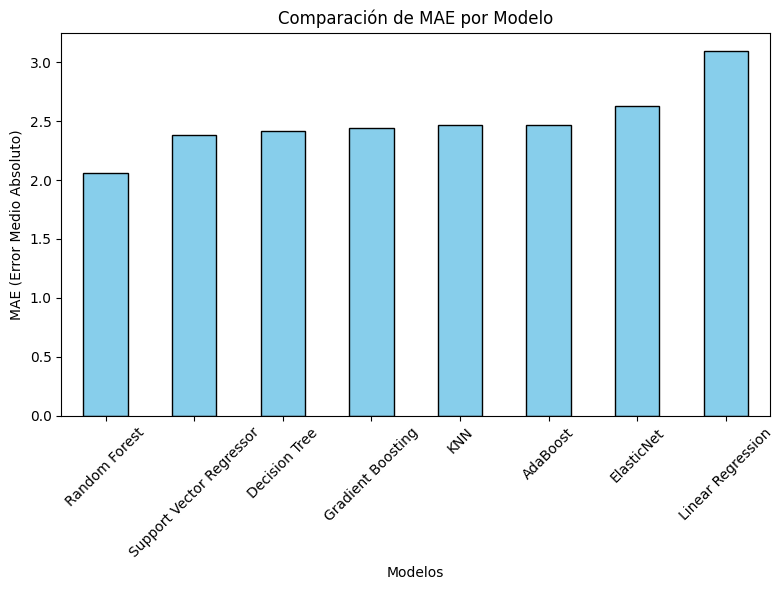

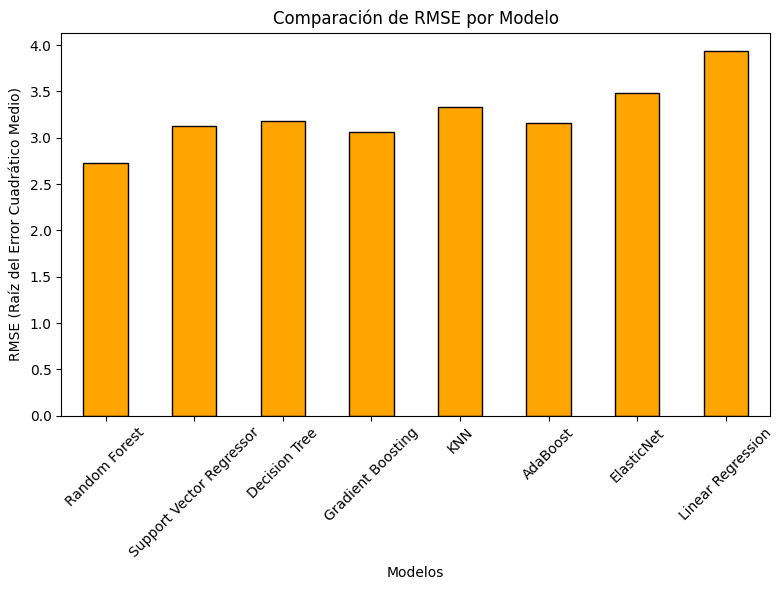

In [17]:
# Gráfico de comparación de MAE
plt.figure(figsize=(8, 6))
metrics_df['MAE'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Comparación de MAE por Modelo')
plt.ylabel('MAE (Error Medio Absoluto)')
plt.xlabel('Modelos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de comparación de RMSE
plt.figure(figsize=(8, 6))
metrics_df['RMSE'].plot(kind='bar', color='orange', edgecolor='black')
plt.title('Comparación de RMSE por Modelo')
plt.ylabel('RMSE (Raíz del Error Cuadrático Medio)')
plt.xlabel('Modelos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Interpretación y Conclusiones
 Random Forest presenta el menor MAE (2.058) y el mejor R² (0.376), destacándose como el modelo más adecuado.
 Los modelos lineales como Linear Regression y ElasticNet muestran el peor desempeño con altos errores y R² negativos.
Se recomienda validar los resultados con validación cruzada para confirmar la generalización del modelo Random Forest.


AHORA CON CROSS VALIDATION:
Se utiliza cross_val_predict para generar predicciones basadas en validación cruzada con 10 folds (cv=10), lo que garantiza una evaluación más robusta del rendimiento del modelo.

Métricas con Validación Cruzada:
                               MAE        MSE      RMSE        R²
Random Forest             3.115166  17.277817  4.156659  0.174751
Support Vector Regressor  3.202347  17.639182  4.199903  0.157490
KNN                       3.275373  18.917919  4.349473  0.096413
Decision Tree             3.293451  18.655119  4.319157  0.108966
ElasticNet                3.310110  19.017466  4.360902  0.091659
Gradient Boosting         3.315669  19.007240  4.359729  0.092147
AdaBoost                  3.377779  18.630005  4.316249  0.110165
Linear Regression         3.431138  19.711353  4.439747  0.058516


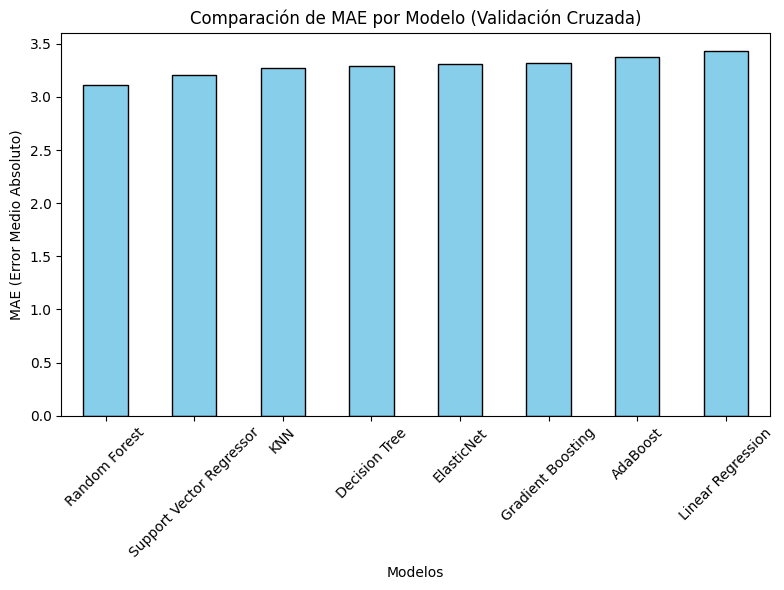

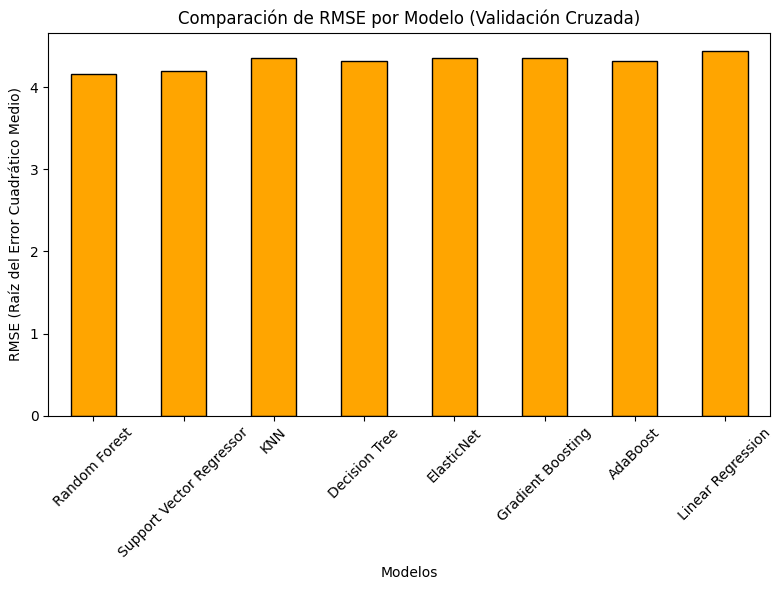

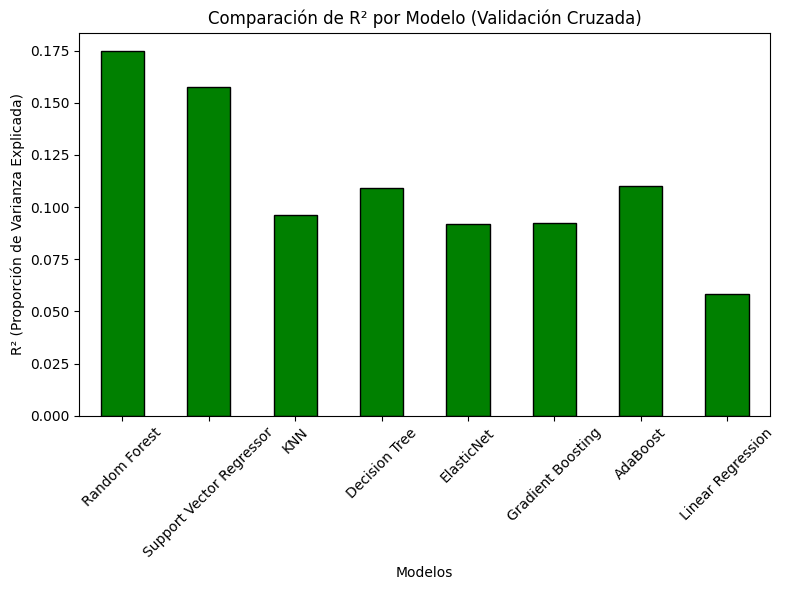

In [18]:
from sklearn.model_selection import cross_val_predict

# Evaluar modelos con validación cruzada
metrics_cv = {}
predictions_cv = {}

# Definir el número de folds para Cross-Validation
cv_folds = 10  # 10-fold Cross-Validation

for model_name, model in models.items():
    # Obtener predicciones usando validación cruzada
    y_pred_cv = cross_val_predict(model, X, y, cv=cv_folds)
    predictions_cv[model_name] = y_pred_cv

    # Calcular métricas
    metrics_cv[model_name] = {
        'MAE': mean_absolute_error(y, y_pred_cv),
        'MSE': mean_squared_error(y, y_pred_cv),
        'RMSE': np.sqrt(mean_squared_error(y, y_pred_cv)),
        'R²': r2_score(y, y_pred_cv)
    }

# Convertir métricas en un DataFrame para visualización
metrics_cv_df = pd.DataFrame(metrics_cv).T.sort_values('MAE')

# Mostrar métricas
print("Métricas con Validación Cruzada:")
print(metrics_cv_df)

# Gráficos de métricas con validación cruzada
# Comparación de MAE
plt.figure(figsize=(8, 6))
metrics_cv_df['MAE'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Comparación de MAE por Modelo (Validación Cruzada)')
plt.ylabel('MAE (Error Medio Absoluto)')
plt.xlabel('Modelos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Comparación de RMSE
plt.figure(figsize=(8, 6))
metrics_cv_df['RMSE'].plot(kind='bar', color='orange', edgecolor='black')
plt.title('Comparación de RMSE por Modelo (Validación Cruzada)')
plt.ylabel('RMSE (Raíz del Error Cuadrático Medio)')
plt.xlabel('Modelos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Comparación de R²
plt.figure(figsize=(8, 6))
metrics_cv_df['R²'].plot(kind='bar', color='green', edgecolor='black')
plt.title('Comparación de R² por Modelo (Validación Cruzada)')
plt.ylabel('R² (Proporción de Varianza Explicada)')
plt.xlabel('Modelos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Random Forest sigue siendo el modelo más destacado, presentando el menor MAE y el mejor R² en validación cruzada. Esto confirma su capacidad para generalizar y manejar la complejidad del dataset, manteniendo errores bajos y explicando la mayor proporción de la varianza en las notas finales (G3).

La validación cruzada confirma que el modelo Random Forest es robusto, con un rendimiento consistente en diferentes particiones del dataset. Este análisis refuerza la elección de Random Forest como el modelo más adecuado para este problema de predicción.

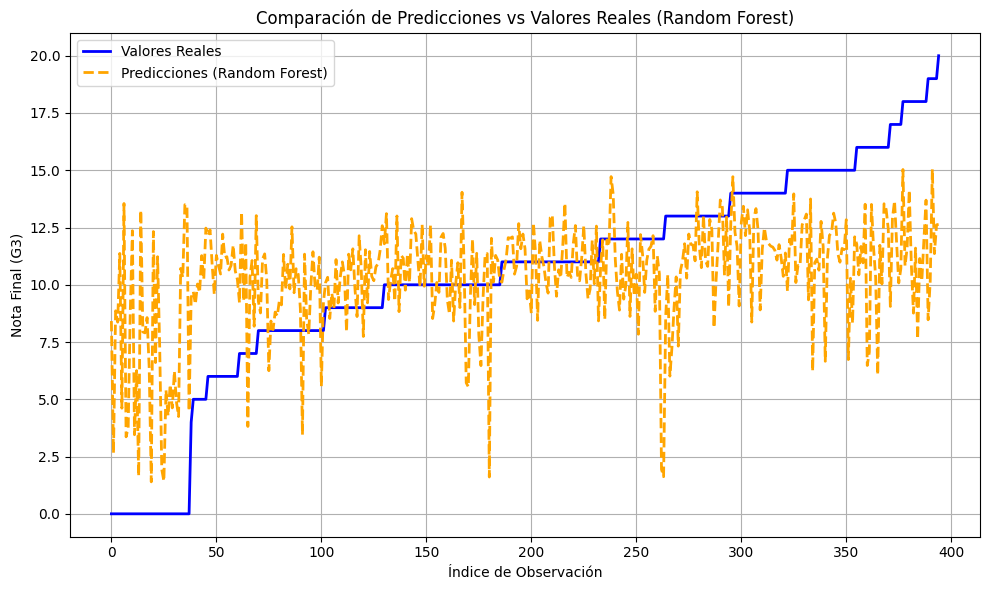

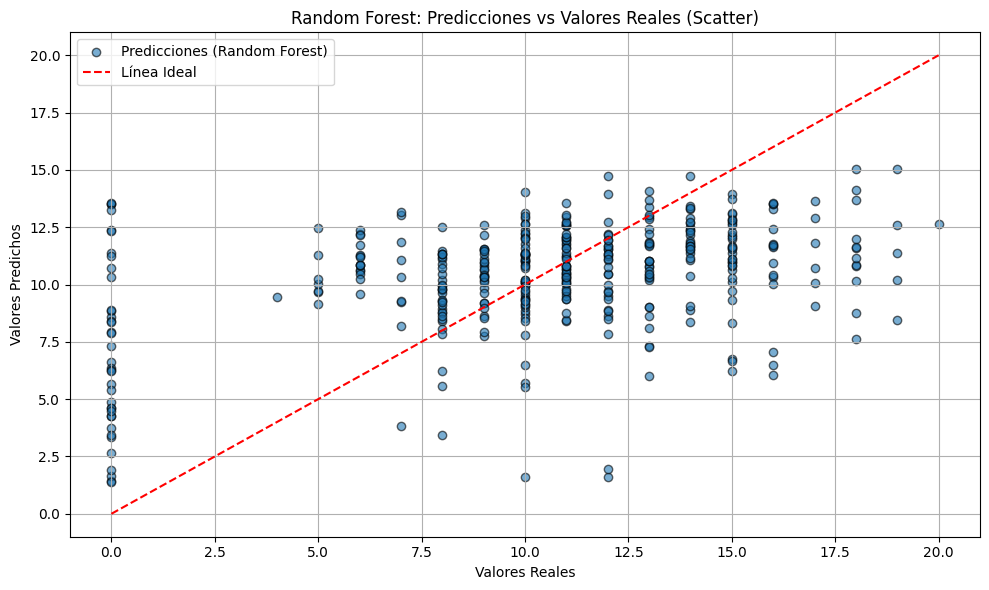

In [19]:
# Gráfico de Línea: Valores Reales vs Predicciones (Random Forest)
best_model = models['Random Forest']
y_pred_rf = predictions_cv['Random Forest']

# Crear un DataFrame para comparar predicciones con valores reales
comparison_df = pd.DataFrame({
    'Valores Reales': y,
    'Predicciones': y_pred_rf
}).sort_values(by='Valores Reales').reset_index(drop=True)

# Gráfico de línea
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Valores Reales'], label='Valores Reales', color='blue', linewidth=2)
plt.plot(comparison_df['Predicciones'], label='Predicciones (Random Forest)', color='orange', linestyle='--', linewidth=2)
plt.title('Comparación de Predicciones vs Valores Reales (Random Forest)')
plt.xlabel('Índice de Observación')
plt.ylabel('Nota Final (G3)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico de Scatter: Predicciones vs Valores Reales (Random Forest)
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred_rf, alpha=0.6, edgecolor='k', label='Predicciones (Random Forest)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Línea Ideal')
plt.title('Random Forest: Predicciones vs Valores Reales (Scatter)')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



El gráfico compara las predicciones del modelo Random Forest, obtenidas mediante validación cruzada, con los valores reales de la nota final (G3). La línea azul representa los valores reales, mientras que la línea naranja discontinua muestra las predicciones del modelo. Observamos que las predicciones siguen de manera general la tendencia de los valores reales, lo que indica que el modelo captura adecuadamente las relaciones clave del dataset. Sin embargo, en los extremos del rango de notas (tanto las más bajas como las más altas), las predicciones muestran una mayor variabilidad, reflejando una menor precisión en esos casos. Para los valores intermedios de G3 (7-10), aunque las predicciones oscilan alrededor de los valores reales, el modelo sigue siendo consistente y confiable. Estos resultados son coherentes con las métricas obtenidas (MAE, RMSE y R²), donde Random Forest demuestra ser el modelo más robusto en este análisis

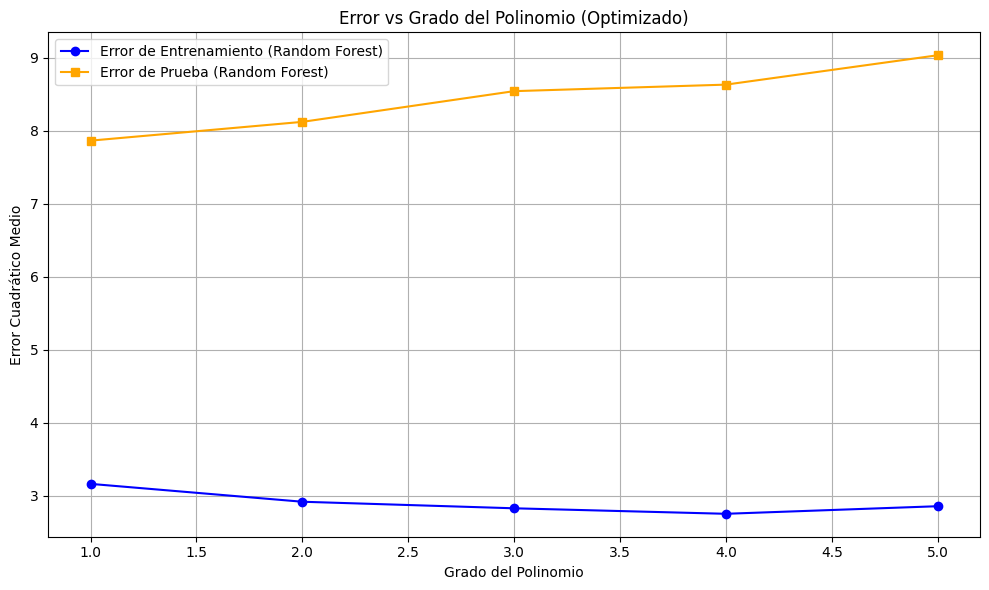

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Optimización: Reducir grados polinómicos
degrees = range(1, 6)  # Reducir a 1-5 grados

# Optimización: Parámetros más ligeros para Random Forest
rf_params = {
    'n_estimators': 50,
    'max_depth': 10,
    'n_jobs': -1,  # Usar todos los núcleos disponibles
    'random_state': 42
}

error_train_rf = []
error_test_rf = []

# Iterar sobre grados polinómicos optimizados
for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = RandomForestRegressor(**rf_params)
    model.fit(X_train_poly, y_train)
    
    pred_train_rf = model.predict(X_train_poly)
    pred_test_rf = model.predict(X_test_poly)
    
    error_train_rf.append(mean_squared_error(y_train, pred_train_rf))
    error_test_rf.append(mean_squared_error(y_test, pred_test_rf))

# Gráfico de errores
plt.figure(figsize=(10, 6))
plt.plot(degrees, error_train_rf, label='Error de Entrenamiento (Random Forest)', marker='o', color='blue')
plt.plot(degrees, error_test_rf, label='Error de Prueba (Random Forest)', marker='s', color='orange')
plt.xlabel('Grado del Polinomio')
plt.ylabel('Error Cuadrático Medio')
plt.title('Error vs Grado del Polinomio (Optimizado)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

    


Interpretación del Gráfico: Error vs Grado del Polinomio (Optimizado)
Tendencia del Error de Entrenamiento (Línea Azul):

A medida que aumenta el grado del polinomio, el error de entrenamiento se mantiene bajo y ligeramente fluctuante.
Esto sugiere que el modelo Random Forest es suficientemente flexible para ajustarse bien incluso con características polinómicas más complejas. Sin embargo, la ligera variación en los grados más altos podría deberse a un sobreajuste en el conjunto de entrenamiento.
Tendencia del Error de Prueba (Línea Naranja):

El error de prueba aumenta gradualmente conforme se incrementa el grado del polinomio. Este comportamiento indica que el modelo está empezando a sobreajustarse, especialmente en los grados más altos (4 y 5), donde el modelo aprende patrones específicos del entrenamiento que no generalizan bien.
Comparación General:

Los errores de prueba y entrenamiento están más equilibrados para grados bajos (1-2), lo que indica que en este rango el modelo logra una mejor generalización sin incurrir en sobreajuste.
Conclusión:

Para este dataset y configuración del modelo Random Forest, los grados 1 y 2 parecen ser los más adecuados, ya que minimizan el error de prueba y mantienen un buen balance con el error de entrenamiento.
Grados más altos (3-5) incrementan la complejidad del modelo innecesariamente, llevando a un sobreajuste.

Sin Polinomios:

Random Forest ya puede manejar relaciones no lineales, por lo que usar las características originales suele ser suficiente.
Es más eficiente y evita sobreajuste en datasets pequeños como el tuyo.
Con Polinomios:

Puede ser útil si estás trabajando con modelos lineales (como ElasticNet o regresión lineal), ya que permite capturar patrones no lineales.
Con Random Forest, el uso de polinomios puede aumentar innecesariamente la complejidad del modelo sin una mejora significativa.

Modelos Comparados:

ElasticNet con los parámetros optimizados (alpha=0.2976, l1_ratio=0.3).
Linear Regression (sin parámetros adicionales).
Validación Cruzada:

Utilizamos 10-fold cross-validation para obtener las predicciones y evaluar el rendimiento de ambos modelos.
Métricas Evaluadas:

MAE (Mean Absolute Error): Promedio del error absoluto entre valores reales y predichos.
R² (Coeficiente de Determinación): Indica qué proporción de la variabilidad en los datos es explicada por el modelo.
Gráficos Generados:

Scatter plots: Comparación de valores reales vs predicciones para ambos modelos, ElasticNet y Linear Regression.
Bar plot: Comparación de los MAE de ambos modelos.

ElasticNet - MAE: 3.43640606129449, R²: 0.03413396291548065
Linear Regression - MAE: 8.392974725157583, R²: -5.3786991124317325


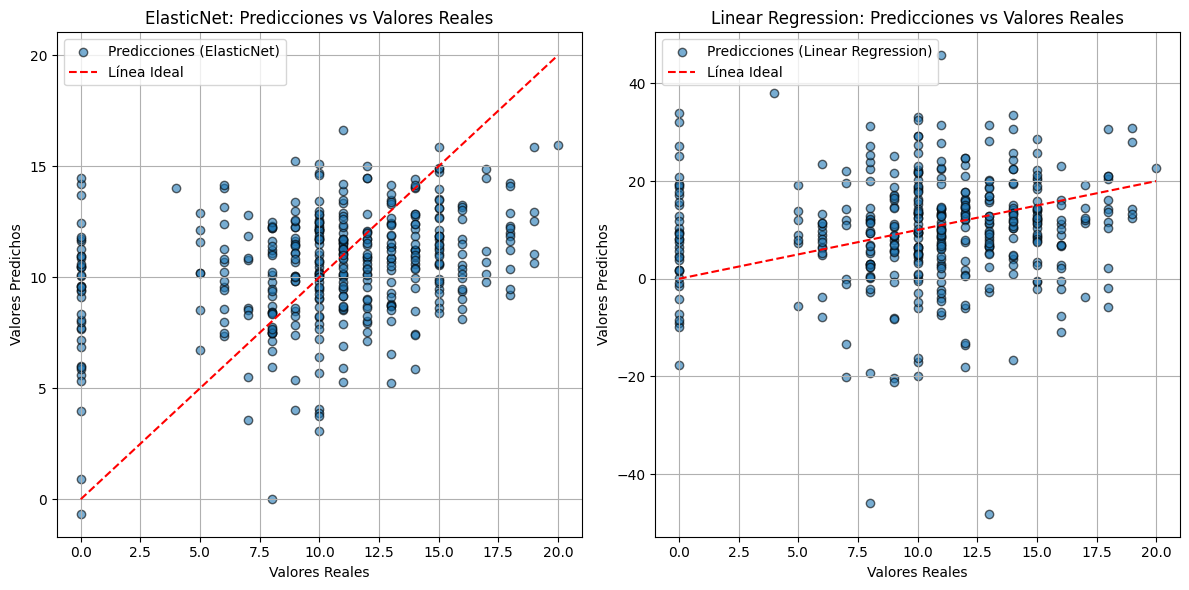

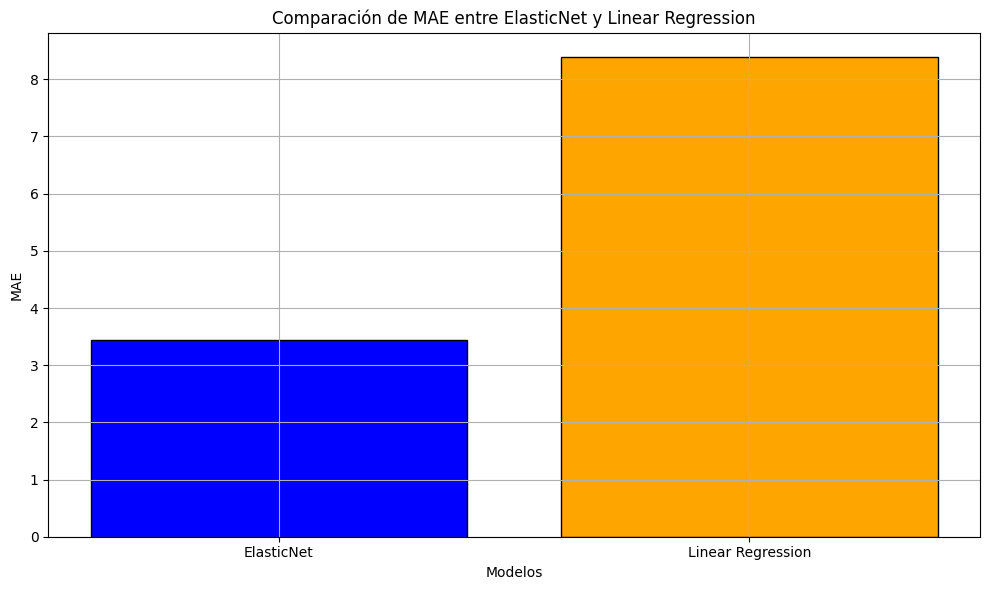

In [21]:
# Escalado de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Transformación polinómica de grado 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)

# Modelos con sus configuraciones
models = {
    "ElasticNet": ElasticNet(alpha=0.29763514416313164, l1_ratio=0.3, random_state=SEED),
    "Linear Regression": LinearRegression(positive=False, fit_intercept=True)
}

# Resultados
mae_results = {}
r2_results = {}
predictions = {}

for name, model in models.items():
    # Validación cruzada
    y_pred_cv = cross_val_predict(model, X_poly, y, cv=10)
    predictions[name] = y_pred_cv

    # Cálculo de métricas
    mae_results[name] = mean_absolute_error(y, y_pred_cv)
    r2_results[name] = r2_score(y, y_pred_cv)

# Mostrar resultados
for name in models.keys():
    print(f"{name} - MAE: {mae_results[name]}, R²: {r2_results[name]}")

# Gráficos de predicciones vs reales
plt.figure(figsize=(12, 6))

# ElasticNet
plt.subplot(1, 2, 1)
plt.scatter(y, predictions["ElasticNet"], alpha=0.6, edgecolor='k', label='Predicciones (ElasticNet)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Línea Ideal')
plt.title('ElasticNet: Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.legend()
plt.grid(True)

# Linear Regression
plt.subplot(1, 2, 2)
plt.scatter(y, predictions["Linear Regression"], alpha=0.6, edgecolor='k', label='Predicciones (Linear Regression)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Línea Ideal')
plt.title('Linear Regression: Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Comparar MAE
plt.figure(figsize=(10, 6))
plt.bar(mae_results.keys(), mae_results.values(), color=['blue', 'orange'], edgecolor='k')
plt.title('Comparación de MAE entre ElasticNet y Linear Regression')
plt.ylabel('MAE')
plt.xlabel('Modelos')
plt.grid(True)
plt.tight_layout()
plt.show()


Dispersión considerable: Los puntos no están concentrados cerca de la línea roja ideal, lo que indica que el modelo tiene dificultad para predecir con precisión las notas finales.
Subestimación y sobreestimación: En varias áreas, los valores predichos se encuentran alejados de los valores reales:
Valores bajos de G3 (0-5): El modelo tiende a sobreestimar algunas notas reales bajas.
Valores altos de G3 (15-20): El modelo tiende a subestimar los valores más altos, generando errores significativos

Esto es consistente con un MAE elevado, lo que refleja que el error promedio absoluto entre predicciones y valores reales es significativo.
Un R² bajo o negativo confirma que ElasticNet no está capturando adecuadamente la variabilidad en los datos.

MEJOR RANDOM FOREST: Random Forest demuestra un mejor ajuste general, con predicciones que siguen más de cerca la línea ideal.

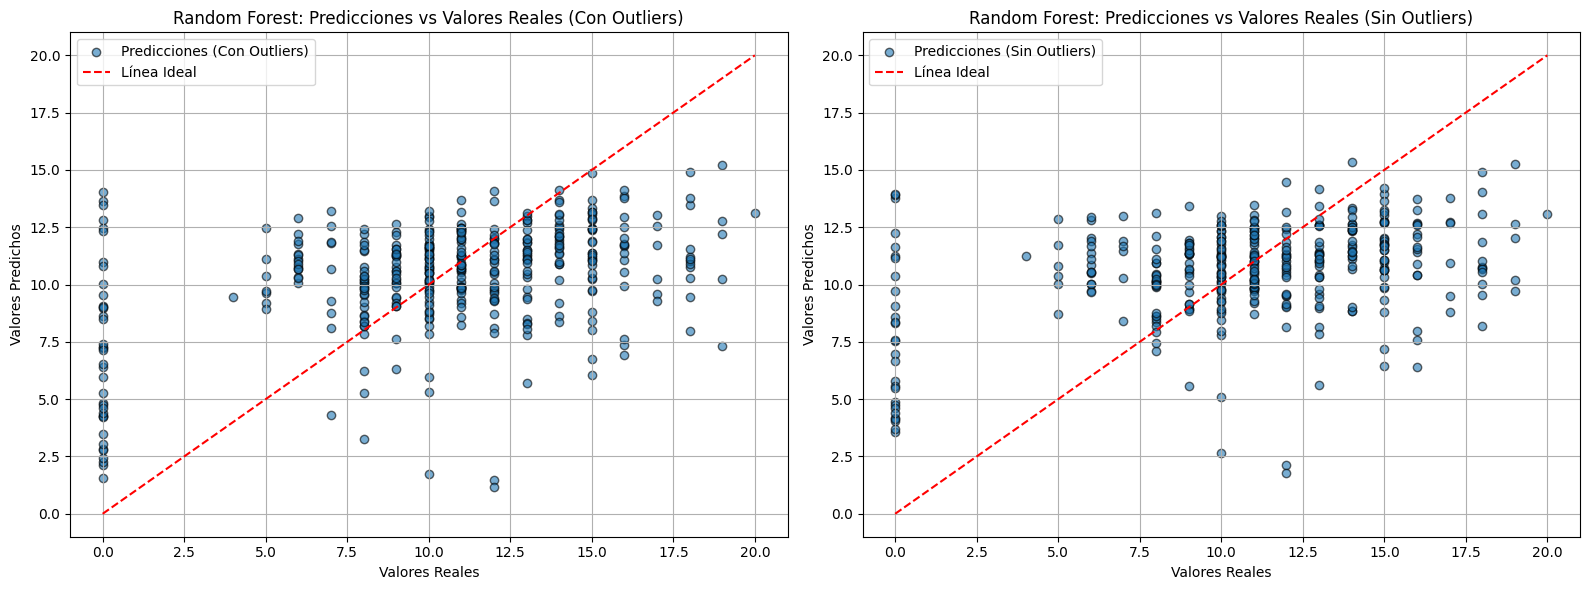

Con Outliers - MAE: 3.108296061884669 R²: 0.1824617563837263
Sin Outliers - MAE: 3.098167683356724 R²: 0.13854504016811375


In [22]:

# Configuración de Random Forest
rf_params = {'random_state': 1,'n_estimators': 150, 'max_features': 0.7, 'max_depth': 20}
rf_model = RandomForestRegressor(**rf_params)

# Separar las variables predictoras y objetivo
X_outliers = df.drop(['G3', 'G2', 'G1'], axis=1)
y_outliers = df['G3']

X_no_outliers = df_no_outliers.drop(['G3', 'G2', 'G1'], axis=1)
y_no_outliers = df_no_outliers['G3']

# Escalar los datos
scaler = StandardScaler()
X_outliers = scaler.fit_transform(X_outliers)
X_no_outliers = scaler.fit_transform(X_no_outliers)

# Validación cruzada con outliers
predictions_outliers = cross_val_predict(rf_model, X_outliers, y_outliers, cv=10)

# Validación cruzada sin outliers
predictions_no_outliers = cross_val_predict(rf_model, X_no_outliers, y_no_outliers, cv=10)

# Gráficos de Comparación

plt.figure(figsize=(16, 6))

# Gráfico con outliers
plt.subplot(1, 2, 1)
plt.scatter(y_outliers, predictions_outliers, alpha=0.6, edgecolor='k', label='Predicciones (Con Outliers)')
plt.plot([y_outliers.min(), y_outliers.max()], [y_outliers.min(), y_outliers.max()], color='red', linestyle='--', label='Línea Ideal')
plt.title('Random Forest: Predicciones vs Valores Reales (Con Outliers)')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.legend()
plt.grid(True)

# Gráfico sin outliers
plt.subplot(1, 2, 2)
plt.scatter(y_no_outliers, predictions_no_outliers, alpha=0.6, edgecolor='k', label='Predicciones (Sin Outliers)')
plt.plot([y_no_outliers.min(), y_no_outliers.max()], [y_no_outliers.min(), y_no_outliers.max()], color='red', linestyle='--', label='Línea Ideal')
plt.title('Random Forest: Predicciones vs Valores Reales (Sin Outliers)')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Cálculo de métricas
# Con outliers
mae_outliers = mean_absolute_error(y_outliers, predictions_outliers)
r2_outliers = r2_score(y_outliers, predictions_outliers)

# Sin outliers
mae_no_outliers = mean_absolute_error(y_no_outliers, predictions_no_outliers)
r2_no_outliers = r2_score(y_no_outliers, predictions_no_outliers)

print("Con Outliers - MAE:", mae_outliers, "R²:", r2_outliers)
print("Sin Outliers - MAE:", mae_no_outliers, "R²:", r2_no_outliers)


Balanceo de clases: La distribución del target (G3) muestra que hay más datos en el rango medio (10-15) y menos en los extremos (especialmente en notas bajas como 0). Esto sesga al modelo hacia las clases más frecuentes.
Ejemplos sintéticos: SMOTE genera datos basados en interpolaciones de las instancias existentes, mejorando la capacidad del modelo para aprender patrones reales en lugar de ruido.
Prevención de overfitting: A diferencia de duplicar ejemplos, SMOTE crea nuevos puntos únicos, reduciendo el riesgo de sobreajuste.

Con Ponderación Directa:
MAE: 2.9344
R²: 0.2648

Sin Ponderación:
MAE: 2.9044
R²: 0.2788


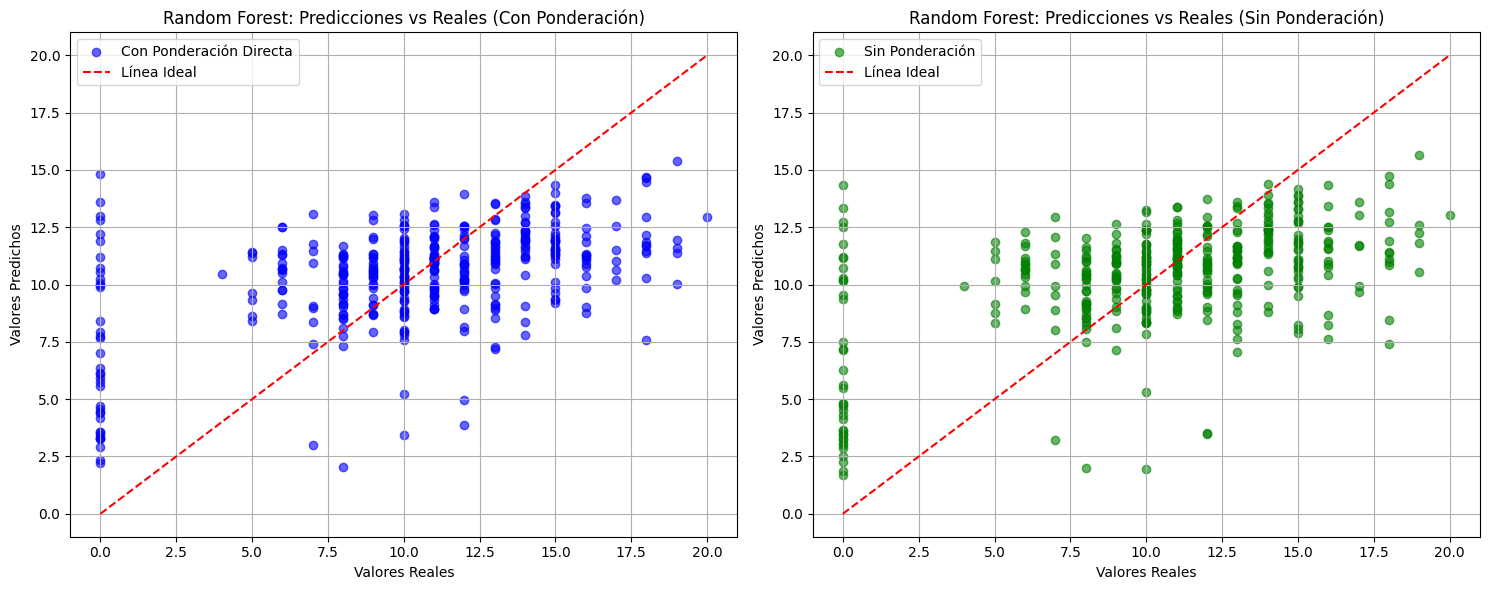

In [23]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Convertir X e y a matrices NumPy
X_np = X.values
y_np = y.values

# Configuración de K-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Arrays para almacenar predicciones y valores reales
y_pred_weighted = np.zeros(len(y))
y_pred_no_weight = np.zeros(len(y))

# Validación cruzada manual
for train_idx, test_idx in kf.split(X_np):
    # Dividir datos en entrenamiento y prueba
    X_train_fold, X_test_fold = X_np[train_idx], X_np[test_idx]
    y_train_fold, y_test_fold = y_np[train_idx], y_np[test_idx]
    
    # Calcular pesos para el conjunto de entrenamiento
    sample_weights_fold = compute_sample_weight("balanced", y_train_fold)
    
    # Modelo con ponderación
    model_rf_weighted = RandomForestRegressor(
        n_estimators=150, 
        max_depth=20, 
        max_features=0.7, 
        random_state=1
    )
    model_rf_weighted.fit(X_train_fold, y_train_fold, sample_weight=sample_weights_fold)
    y_pred_weighted[test_idx] = model_rf_weighted.predict(X_test_fold)
    
    # Modelo sin ponderación
    model_rf_no_weight = RandomForestRegressor(
        n_estimators=150, 
        max_depth=20, 
        max_features=0.7, 
        random_state=1
    )
    model_rf_no_weight.fit(X_train_fold, y_train_fold)
    y_pred_no_weight[test_idx] = model_rf_no_weight.predict(X_test_fold)

# Calcular métricas
mae_weighted = mean_absolute_error(y_np, y_pred_weighted)
r2_weighted = r2_score(y_np, y_pred_weighted)

mae_no_weight = mean_absolute_error(y_np, y_pred_no_weight)
r2_no_weight = r2_score(y_np, y_pred_no_weight)

print("Con Ponderación Directa:")
print(f"MAE: {mae_weighted:.4f}")
print(f"R²: {r2_weighted:.4f}")

print("\nSin Ponderación:")
print(f"MAE: {mae_no_weight:.4f}")
print(f"R²: {r2_no_weight:.4f}")

# Graficar resultados
plt.figure(figsize=(15, 6))

# Con Ponderación
plt.subplot(1, 2, 1)
plt.scatter(y_np, y_pred_weighted, alpha=0.6, label='Con Ponderación Directa', color='blue')
plt.plot([y_np.min(), y_np.max()], [y_np.min(), y_np.max()], color='red', linestyle='--', label='Línea Ideal')
plt.title('Random Forest: Predicciones vs Reales (Con Ponderación)')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.legend()
plt.grid(True)

# Sin Ponderación
plt.subplot(1, 2, 2)
plt.scatter(y_np, y_pred_no_weight, alpha=0.6, label='Sin Ponderación', color='green')
plt.plot([y_np.min(), y_np.max()], [y_np.min(), y_np.max()], color='red', linestyle='--', label='Línea Ideal')
plt.title('Random Forest: Predicciones vs Reales (Sin Ponderación)')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Conclusión del Proyecto
El objetivo inicial de este proyecto fue predecir la calificación final de los estudiantes (G3) utilizando características personales, sociales y académicas disponibles al inicio del curso. A pesar de implementar diversas técnicas avanzadas de Machine Learning, los resultados obtenidos muestran que las predicciones no alcanzan el nivel de precisión esperado. Esto plantea una serie de reflexiones sobre la naturaleza del dataset y el enfoque del problema.

Limitaciones del Dataset
Un análisis exhaustivo indica que las variables disponibles no son lo suficientemente predictivas para capturar la complejidad de las calificaciones finales. Factores como el tiempo de estudio, el apoyo familiar y el historial académico proporcionan cierta información útil, pero no explican completamente las variaciones en G3.

Además, se observan variables externas al dataset que podrían ser determinantes en el rendimiento académico, como:

Motivación personal: Un factor crucial que no está representado en los datos.
Eventos externos: Situaciones como problemas de salud, cambios en el entorno familiar o emocional, que afectan significativamente el desempeño.
Calidad educativa: Elementos como la calidad del profesor o el método de enseñanza no están presentes en las variables.
Estas omisiones limitan el potencial de los modelos para generalizar y producir predicciones precisas.


Conclusión del Proyecto
El objetivo inicial de este proyecto fue predecir la calificación final de los estudiantes (G3) utilizando características personales, sociales y académicas disponibles al inicio del curso. A pesar de implementar diversas técnicas avanzadas de Machine Learning, los resultados obtenidos muestran que las predicciones no alcanzan el nivel de precisión esperado. Esto plantea una serie de reflexiones sobre la naturaleza del dataset y el enfoque del problema.

Limitaciones del Dataset
Un análisis exhaustivo indica que las variables disponibles no son lo suficientemente predictivas para capturar la complejidad de las calificaciones finales. Factores como el tiempo de estudio, el apoyo familiar y el historial académico proporcionan cierta información útil, pero no explican completamente las variaciones en G3.

Además, se observan variables externas al dataset que podrían ser determinantes en el rendimiento académico, como:

Motivación personal: Un factor crucial que no está representado en los datos.
Eventos externos: Situaciones como problemas de salud, cambios en el entorno familiar o emocional, que afectan significativamente el desempeño.
Calidad educativa: Elementos como la calidad del profesor o el método de enseñanza no están presentes en las variables.
Estas omisiones limitan el potencial de los modelos para generalizar y producir predicciones precisas.

Estrategias Probadas
Se realizaron múltiples intentos para mejorar el rendimiento del modelo, entre ellos:

Balanceo manual del dataset: Se ajustó la representatividad de las observaciones en diferentes rangos de G3, pero no hubo mejoras significativas.
Validación cruzada: Se implementó para asegurar que los resultados no dependieran de una sola división de los datos.
Optimización de hiperparámetros: Se exploraron modelos como Random Forest, Gradient Boosting, y Support Vector Machines, ajustando sus configuraciones con búsquedas aleatorias (RandomizedSearchCV).
Transformaciones polinomiales: Se probó con diferentes grados para capturar relaciones no lineales.
Eliminación de outliers: Técnicas como Z-score y análisis intercuartílico (IQR) se usaron para reducir la influencia de valores extremos.
A pesar de estos esfuerzos, las métricas como MAE (Error Absoluto Medio) y R² (Coeficiente de Determinación) no mostraron mejoras significativas. Esto refuerza la hipótesis de que las variables disponibles no son suficientes para capturar la complejidad del problema.



In [24]:
from collections import Counter

# Crear variable binaria
y_binary = (y >= 10).astype(int)  # 1 para aprobado, 0 para reprobado

# Verificar el balance de clases
print("Distribución de clases:", Counter(y_binary))

Distribución de clases: Counter({1: 265, 0: 130})


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Modelo Random Forest
model_rf = RandomForestClassifier(n_estimators=150, max_depth=20, random_state=42)
model_rf.fit(X_train, y_train)

# Predicciones
y_pred = model_rf.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))


Accuracy: 0.7215189873417721
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.73      0.30      0.42        27
           1       0.72      0.94      0.82        52

    accuracy                           0.72        79
   macro avg       0.72      0.62      0.62        79
weighted avg       0.72      0.72      0.68        79



In [26]:
from sklearn.model_selection import cross_val_score

# Validación cruzada
scores = cross_val_score(model_rf, X, y_binary, cv=5, scoring='accuracy')
print("Accuracy promedio en validación cruzada:", scores.mean())


Accuracy promedio en validación cruzada: 0.6987341772151898


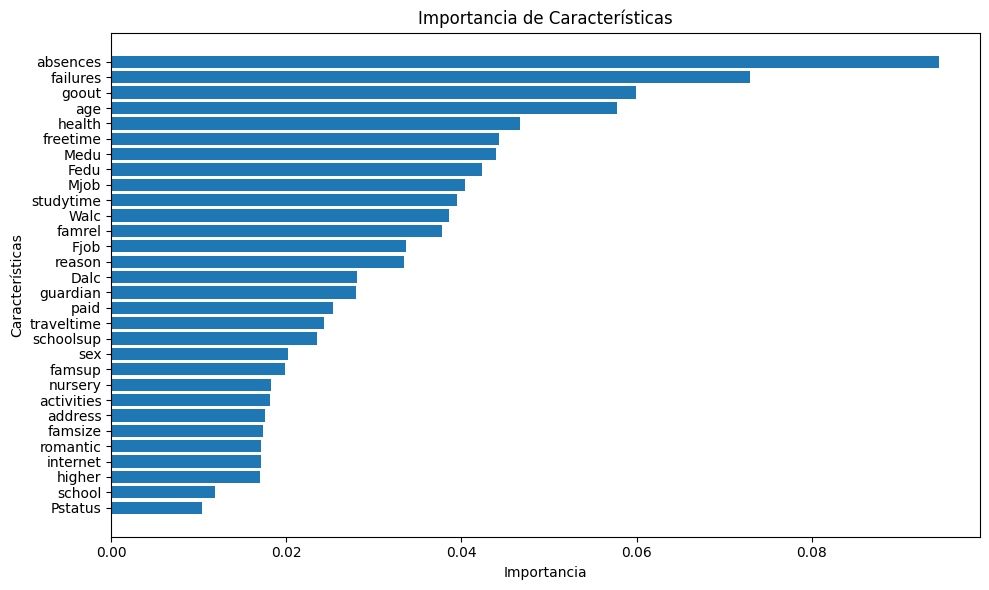

In [27]:
# Importancia de características
importances = model_rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualizar importancia
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title("Importancia de Características")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


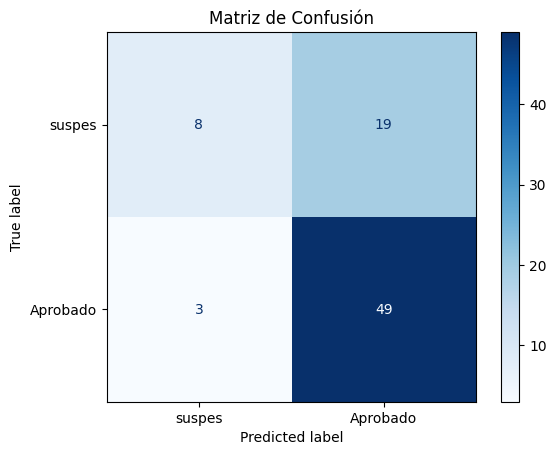

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['suspes', 'Aprobado'])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()


El modelo tiene un sesgo hacia la clase "Aprobado", lo que provoca un mayor número de falsos positivos (19). Esta tendencia es esperable si el dataset está desbalanceado, con más estudiantes aprobados que suspes.

In [30]:
# Random Forest con ponderación de clases
model_rf_balanced = RandomForestClassifier(n_estimators=150, max_depth=20, class_weight='balanced', random_state=42)
model_rf_balanced.fit(X_train, y_train)

# Predicciones
y_pred_balanced = model_rf_balanced.predict(X_test)

# Métricas
print("Matriz de Confusión con Ponderación de Clases:")
print(confusion_matrix(y_test, y_pred_balanced))
print(classification_report(y_test, y_pred_balanced))


Matriz de Confusión con Ponderación de Clases:
[[ 4 23]
 [ 3 49]]
              precision    recall  f1-score   support

           0       0.57      0.15      0.24        27
           1       0.68      0.94      0.79        52

    accuracy                           0.67        79
   macro avg       0.63      0.55      0.51        79
weighted avg       0.64      0.67      0.60        79



Distribución de clases después de sobremuestreo: Counter({1: 213, 0: 213})


/var/folders/fm/9pzntrns5_s8x46kp5sm9x240000gn/T/ipykernel_28205/903390672.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette="pastel")


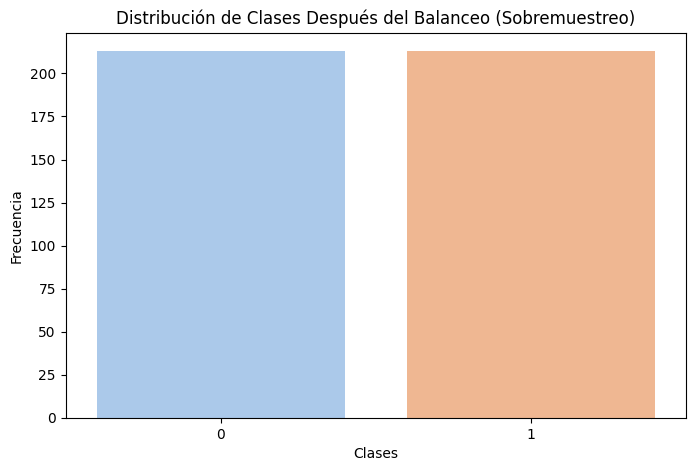

<Figure size 800x600 with 0 Axes>

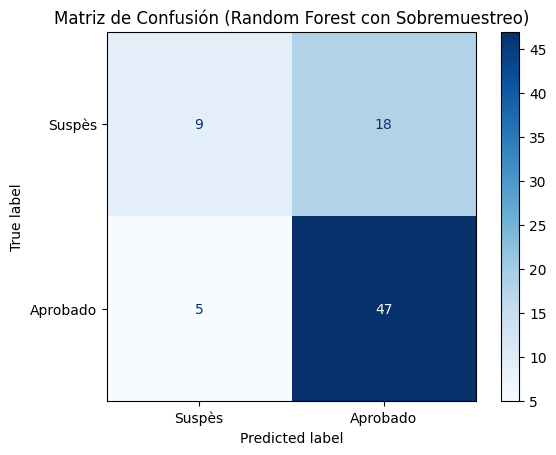


Reporte de Clasificación:

              precision    recall  f1-score   support

      Suspès       0.64      0.33      0.44        27
    Aprobado       0.72      0.90      0.80        52

    accuracy                           0.71        79
   macro avg       0.68      0.62      0.62        79
weighted avg       0.70      0.71      0.68        79



In [32]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Sobremuestrear la clase minoritaria
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Distribución de clases
print("Distribución de clases después de sobremuestreo:", Counter(y_resampled))

# Graficar distribución
plt.figure(figsize=(8, 5))
sns.countplot(x=y_resampled, palette="pastel")
plt.title("Distribución de Clases Después del Balanceo (Sobremuestreo)")
plt.xlabel("Clases")
plt.ylabel("Frecuencia")
plt.show()

# Entrenar el modelo Random Forest con los datos sobremuestreados
model_rf_balanced = RandomForestClassifier(
    n_estimators=150, max_depth=20, class_weight=None, random_state=42
)
model_rf_balanced.fit(X_resampled, y_resampled)

# Predicciones en el conjunto de prueba
y_pred = model_rf_balanced.predict(X_test)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred, labels=model_rf_balanced.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Suspès", "Aprobado"])

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
disp.plot(cmap="Blues", values_format='d')
plt.title("Matriz de Confusión (Random Forest con Sobremuestreo)")
plt.show()

# Reporte de Clasificación
print("\nReporte de Clasificación:\n")
print(classification_report(y_test, y_pred, target_names=["Suspès", "Aprobado"]))



Limitaciones de las Variables Predictoras
Las variables disponibles en el dataset (características personales, sociales y académicas) no son lo suficientemente predictivas para diferenciar con precisión entre aprobados y suspensos.
Factores críticos como motivación del estudiante, hábitos de estudio, entorno familiar, o eventos externos no están representados en los datos.

Evidencia: Incluso con sobremuestreo, el modelo no logra captar patrones claros que separen ambas clases, lo cual sugiere falta de información relevante.



Accuracy con Outliers: 0.7088607594936709
Accuracy sin Outliers (solo Train): 0.6835443037974683


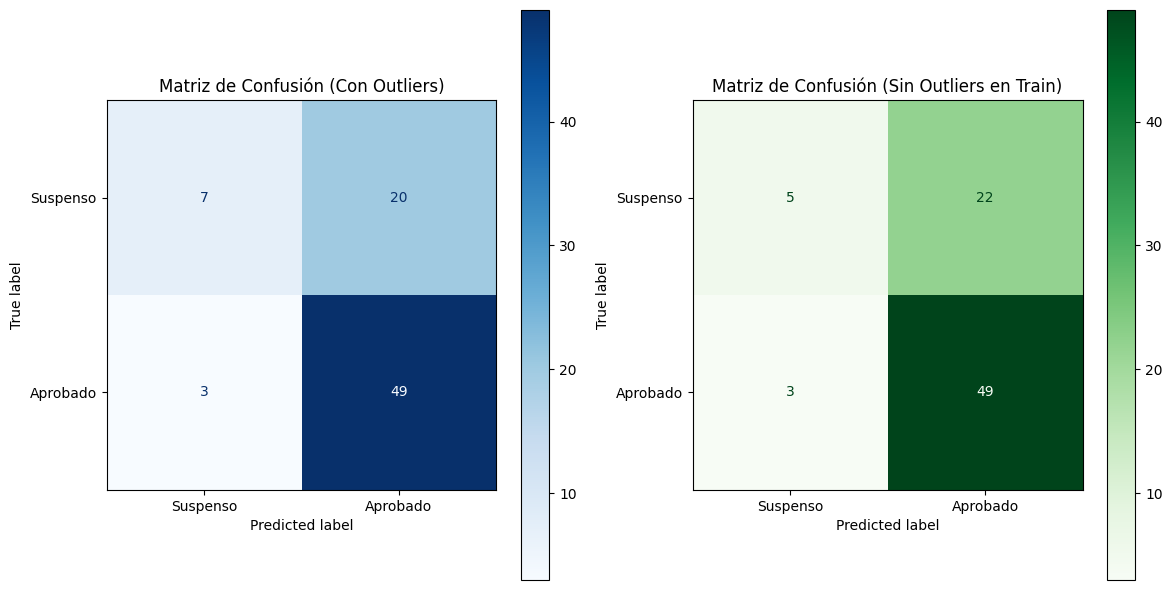

In [33]:
# Separar el dataset en train y test sin tocar el test todavía
X = df.drop(['G3', 'G2', 'G1'], axis=1)
y = (df['G3'] >= 10).astype(int)  # Binarización

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identificar outliers en el conjunto de entrenamiento
from scipy import stats
z_scores_train = np.abs(stats.zscore(X_train))
outliers_train = (z_scores_train > 3).any(axis=1)

# Eliminar outliers solo del conjunto de entrenamiento
X_train_no_outliers = X_train[~outliers_train]
y_train_no_outliers = y_train[~outliers_train]

# Escalar los datos (escalamos todo con el mismo scaler)
scaler = StandardScaler()
X_train_no_outliers = scaler.fit_transform(X_train_no_outliers)
X_train = scaler.transform(X_train)  # Con outliers
X_test = scaler.transform(X_test)    # Test sin cambios

# Comparar Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Modelo con outliers
rf_with_outliers = RandomForestClassifier(n_estimators=100, random_state=42)
rf_with_outliers.fit(X_train, y_train)
y_pred_with = rf_with_outliers.predict(X_test)

# Modelo sin outliers
rf_no_outliers = RandomForestClassifier(n_estimators=100, random_state=42)
rf_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)
y_pred_no = rf_no_outliers.predict(X_test)

# Métricas
print("Accuracy con Outliers:", accuracy_score(y_test, y_pred_with))
print("Accuracy sin Outliers (solo Train):", accuracy_score(y_test, y_pred_no))

# Matrices de Confusión
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Con outliers
cm_with = confusion_matrix(y_test, y_pred_with)
ConfusionMatrixDisplay(cm_with, display_labels=['Suspenso', 'Aprobado']).plot(ax=axes[0], cmap='Blues')
axes[0].set_title('Matriz de Confusión (Con Outliers)')

# Sin outliers
cm_no = confusion_matrix(y_test, y_pred_no)
ConfusionMatrixDisplay(cm_no, display_labels=['Suspenso', 'Aprobado']).plot(ax=axes[1], cmap='Greens')
axes[1].set_title('Matriz de Confusión (Sin Outliers en Train)')

plt.tight_layout()
plt.show()



Matriz de Confusión para Logistic Regression:


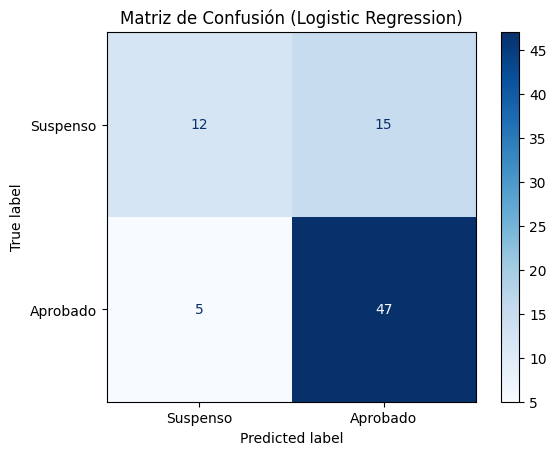


Matriz de Confusión para Random Forest:


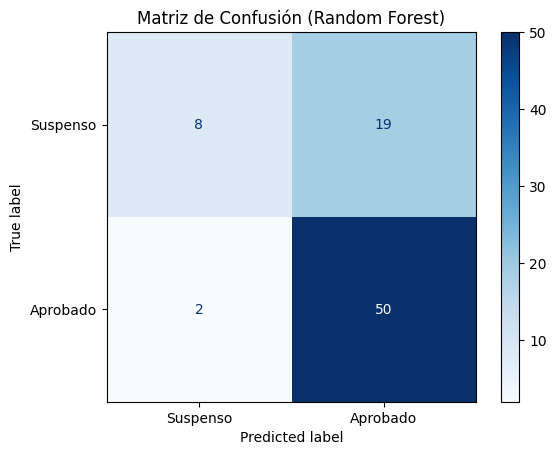


Matriz de Confusión para SVM:


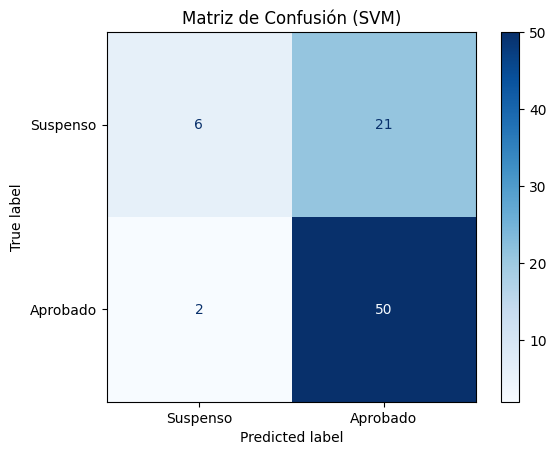


Matriz de Confusión para Gradient Boosting:


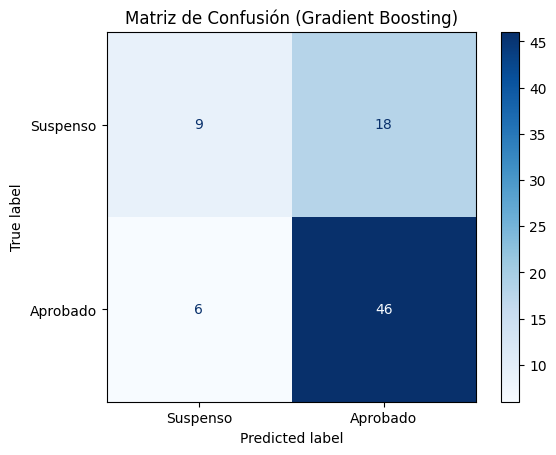


Matriz de Confusión para KNN:


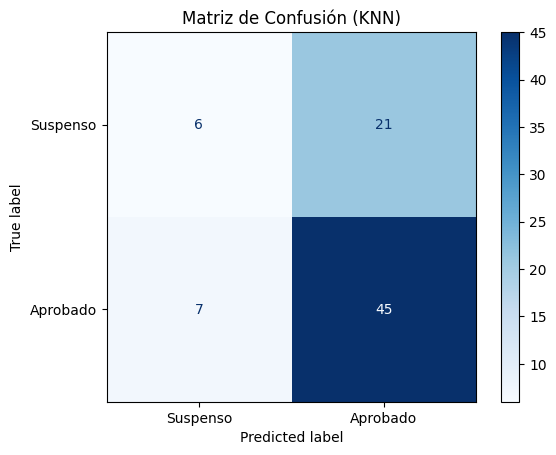


Matriz de Confusión para Decision Tree:


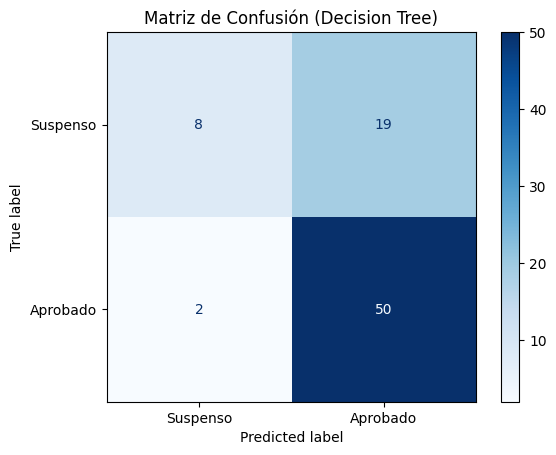


Resultados de Comparación de Modelos (Con Outliers):
                     CV Mean Accuracy  Test Accuracy  Precision    Recall  \
Logistic Regression          0.680456       0.746835   0.758065  0.903846   
Random Forest                0.696280       0.734177   0.724638  0.961538   
SVM                          0.724653       0.708861   0.704225  0.961538   
Gradient Boosting            0.664782       0.696203   0.718750  0.884615   
KNN                          0.686756       0.645570   0.681818  0.865385   
Decision Tree                0.655109       0.734177   0.724638  0.961538   

                     F1-Score  
Logistic Regression  0.824561  
Random Forest        0.826446  
SVM                  0.813008  
Gradient Boosting    0.793103  
KNN                  0.762712  
Decision Tree        0.826446  


/var/folders/fm/9pzntrns5_s8x46kp5sm9x240000gn/T/ipykernel_28205/1540735353.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_with_outliers, x=results_with_outliers.index, y='Test Accuracy', palette='Blues')


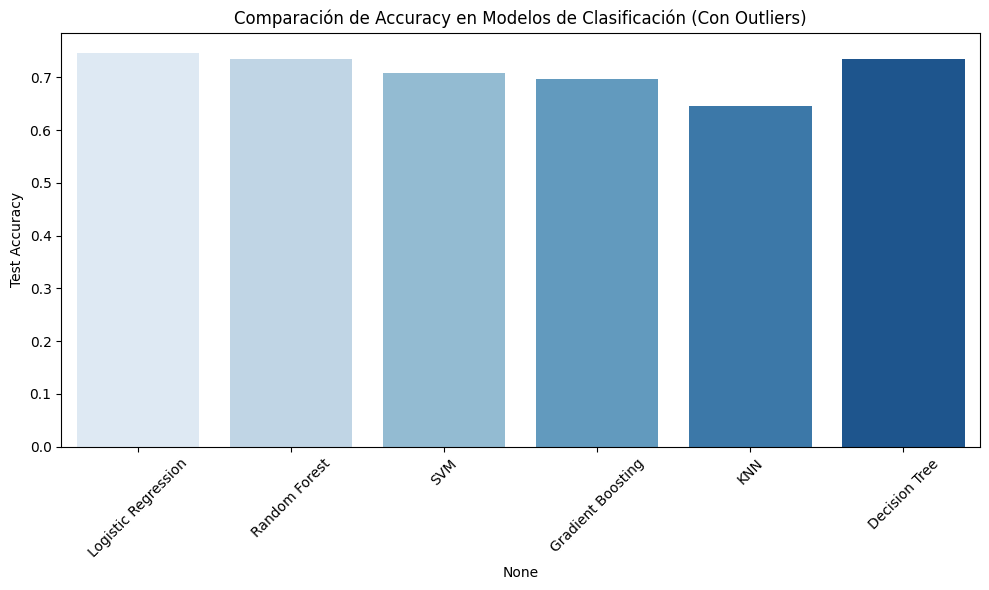

In [38]:
# Preprocesamiento del dataset
X = df.drop(['G3', 'G2', 'G1'], axis=1)  # Variables predictoras
y = (df['G3'] >= 10).astype(int)         # Binarización: 1 (Aprobado) y 0 (Suspenso)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definición de Modelos
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42)
}

# Evaluación de los modelos
def evaluate_models_with_outliers(models, X_train, y_train, X_test, y_test):
    results = {}
    for name, model in models.items():
        # Validación cruzada
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        
        # Entrenamiento y predicción
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Métricas
        results[name] = {
            'CV Mean Accuracy': np.mean(cv_scores),
            'Test Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'F1-Score': f1_score(y_test, y_pred)
        }
        
        # Matriz de confusión
        print(f"\nMatriz de Confusión para {name}:")
        cm = confusion_matrix(y_test, y_pred)
        display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Suspenso', 'Aprobado'])
        display.plot(cmap="Blues")
        plt.title(f'Matriz de Confusión ({name})')
        plt.show()
    return pd.DataFrame(results).T

# Evaluar modelos con outliers
results_with_outliers = evaluate_models_with_outliers(models, X_train, y_train, X_test, y_test)

# Mostrar resultados
print("\nResultados de Comparación de Modelos (Con Outliers):")
print(results_with_outliers)

# Visualización de resultados
plt.figure(figsize=(10, 6))
sns.barplot(data=results_with_outliers, x=results_with_outliers.index, y='Test Accuracy', palette='Blues')
plt.title('Comparación de Accuracy en Modelos de Clasificación (Con Outliers)')
plt.xticks(rotation=45)
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()


Conclusión Final
El desempeño de los modelos de clasificación binaria indica que el dataset presenta limitaciones en su capacidad predictiva. Aunque la precisión (Test Accuracy) alcanza un valor alrededor del 70% para la mayoría de los modelos, esto no necesariamente significa que el modelo sea efectivo para predecir la calificación final de los estudiantes.

Problemas Identificados:
Distribución de la Variable Objetivo:
El gráfico de distribución de G3 mostró una gran acumulación de valores en el rango medio (notas entre 8 y 14). Esto dificulta la separación clara entre las clases (Aprobado y Suspenso), ya que los valores en el límite (por ejemplo, G3=10) son ambiguos y el modelo puede "adivinar" de forma aleatoria.

Variables Predictoras Limitadas:
Las características incluidas (factores personales, sociales y académicos) no parecen ser lo suficientemente descriptivas ni relevantes para capturar las variaciones en el rendimiento académico. Faltan variables clave como:

Motivación intrínseca del estudiante.
Calidad de enseñanza o asistencia.
Entorno socioeconómico detallado.
Aleatoriedad Aparente:
El 70% de precisión obtenido podría ser producto de la aleatoriedad. Esto ocurre cuando el modelo no logra identificar patrones claros en los datos debido a la falta de variables relevantes o a un desequilibrio entre clases.



Clases:
Se definieron 4 clases basadas en G3, lo que permite una categorización más detallada.

Modelos:
Se usaron modelos robustos para clasificación como Random Forest, Gradient Boosting, SVM y Logistic Regression.

Validación:
Se aplicó validación cruzada con train_test_split y se evaluaron los modelos con accuracy, classification report, y matriz de confusión.

Visualización:
Los resultados se grafican para comparar el accuracy entre los modelos.

--- Random Forest ---
Accuracy: 0.45569620253164556
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.11      0.20         9
           1       0.12      0.06      0.08        17
           2       0.49      0.82      0.61        38
           3       0.43      0.20      0.27        15

    accuracy                           0.46        79
   macro avg       0.51      0.30      0.29        79
weighted avg       0.46      0.46      0.39        79



--- Gradient Boosting ---
Accuracy: 0.4936708860759494
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.44      0.57         9
           1       0.33      0.24      0.28        17
           2       0.52      0.74      0.61        38
           3       0.38      0.20      0.26        15

    accuracy                           0.49        79
   macro avg       0.51      0.40      0.43        79
weighted avg       0.48     

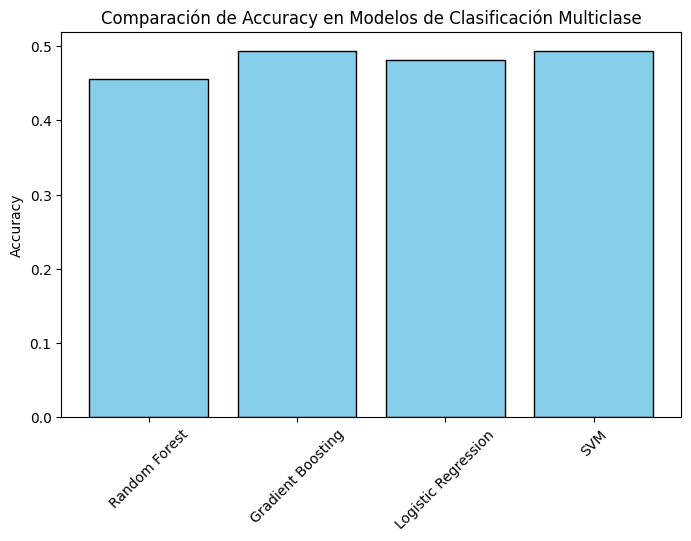

In [39]:
# 1. Crear las clases a partir de G3
def assign_class(g3):
    if g3 <= 5:
        return 0  # Muy Bajo
    elif g3 <= 9:
        return 1  # Bajo
    elif g3 <= 14:
        return 2  # Medio
    else:
        return 3  # Alto

df['G3_class'] = df['G3'].apply(assign_class)

# 2. Definir variables predictoras y objetivo
X = df.drop(['G3', 'G2', 'G1', 'G3_class'], axis=1)
y = df['G3_class']

# 3. Escalado de las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# 5. Modelos a probar
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42)
}

# 6. Entrenamiento y Evaluación
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"--- {name} ---")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")

# 7. Visualizar Resultados
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color='skyblue', edgecolor='black')
plt.title('Comparación de Accuracy en Modelos de Clasificación Multiclase')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()


Comparación de Random Forest en diferentes escenarios:

Random Forest: Sin G1 y G2
MAE: 3.2016, R²: 0.1518



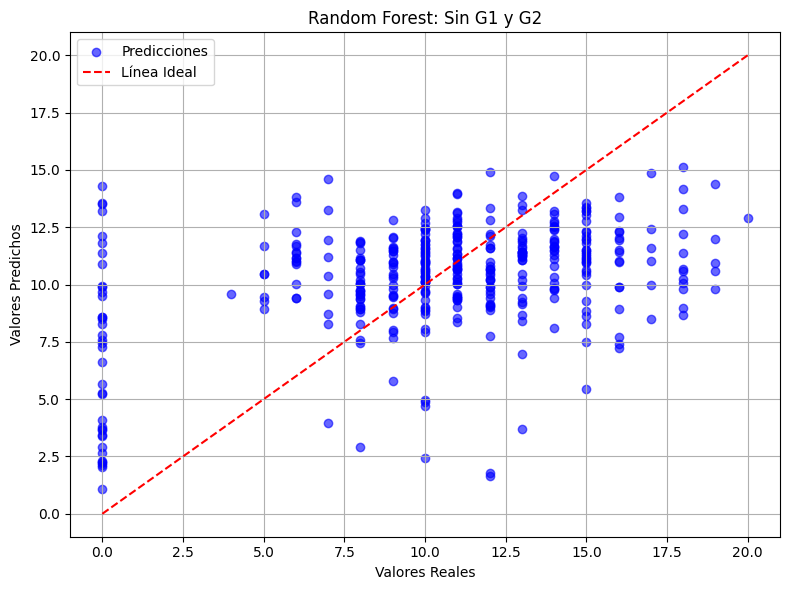

Random Forest: Con G1
MAE: 1.7873, R²: 0.7038



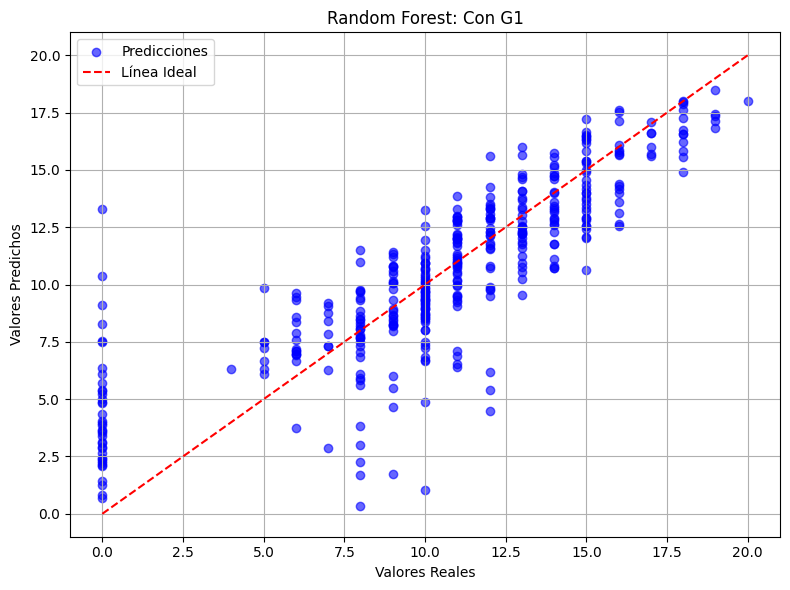

Random Forest: Con G1 y G2
MAE: 1.1042, R²: 0.8401



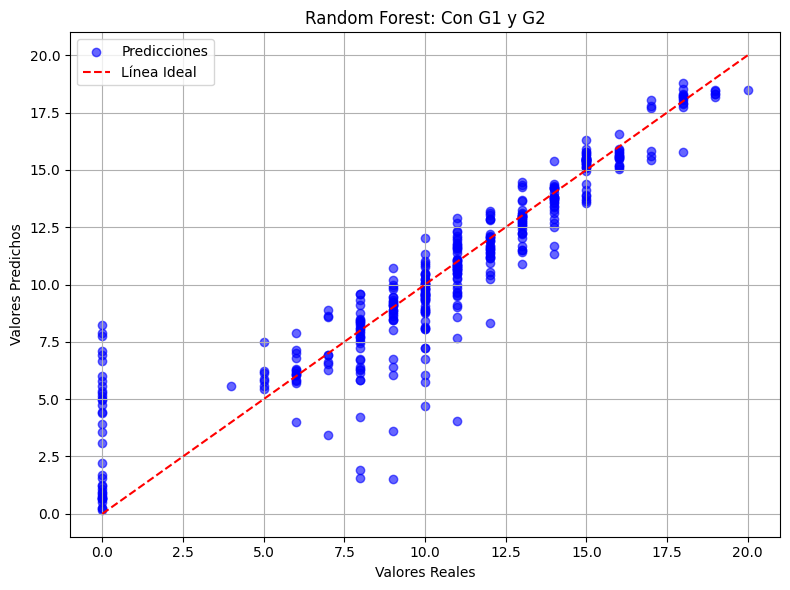

In [47]:
# Definir los tres escenarios
# 1. Sin G1 y G2
X_no_g1g2 = df.drop(['G1', 'G2', 'G3'], axis=1)
y_no_g1g2 = df['G3']

# 2. Con G1 (sin G2)
X_with_g1 = df.drop(['G2', 'G3'], axis=1)
y_with_g1 = df['G3']

# 3. Con G1 y G2
X_with_g1g2 = df.drop(['G3'], axis=1)
y_with_g1g2 = df['G3']

# Función para entrenar Random Forest y graficar resultados
def train_and_plot_rf(X, y, title):
    # Escalar los datos
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Validación cruzada
    model = RandomForestRegressor(n_estimators=150, max_depth=20, random_state=42)
    y_pred_cv = cross_val_predict(model, X_scaled, y, cv=5)
    
    # Calcular métricas
    mae = mean_absolute_error(y, y_pred_cv)
    r2 = r2_score(y, y_pred_cv)
    
    print(f"{title}\nMAE: {mae:.4f}, R²: {r2:.4f}\n")
    
    # Graficar resultados
    plt.figure(figsize=(8, 6))
    plt.scatter(y, y_pred_cv, alpha=0.6, color='blue', label='Predicciones')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Línea Ideal')
    plt.title(title)
    plt.xlabel('Valores Reales')
    plt.ylabel('Valores Predichos')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Comparación de los tres escenarios
print("Comparación de Random Forest en diferentes escenarios:\n")

# Escenario 1: Sin G1 y G2
train_and_plot_rf(X_no_g1g2, y_no_g1g2, "Random Forest: Sin G1 y G2")

# Escenario 2: Con G1
train_and_plot_rf(X_with_g1, y_with_g1, "Random Forest: Con G1")

# Escenario 3: Con G1 y G2
train_and_plot_rf(X_with_g1g2, y_with_g1g2, "Random Forest: Con G1 y G2")


Los resultados de las predicciones de Random Forest en los tres escenarios muestran claramente el impacto de incluir las variables G1 y G2 en el modelo. En el primer gráfico (sin G1 ni G2), las predicciones están muy dispersas, especialmente para valores bajos y medios, lo que indica una incapacidad del modelo para capturar patrones consistentes en los datos. Esto refleja que las características disponibles, sin incluir calificaciones parciales anteriores, no son lo suficientemente predictivas.

En el segundo gráfico (incluyendo G1), la precisión mejora significativamente. Las predicciones se alinean mejor con la línea ideal, aunque aún se observan dispersión y errores para valores extremos. La inclusión de G1 proporciona información crucial, ya que la calificación parcial anterior tiene una fuerte correlación con el rendimiento final (G3).

Finalmente, en el tercer gráfico (con G1 y G2), las predicciones muestran la mayor alineación con la línea ideal, lo que indica un ajuste mucho mejor. G1 y G2 capturan una gran parte de la varianza explicada en G3, permitiendo que el modelo realice predicciones más precisas.

En conclusión, incluir variables como G1 y G2 es crucial para mejorar el rendimiento del modelo, ya que reflejan el progreso académico del estudiante durante el curso. Sin estas variables, el modelo tiene un rendimiento significativamente menor debido a la falta de información predictiva.

Nuevas columnas añadidas al dataset:
    school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    0   18        1        0        0     4     4     0     4  ...   
1       0    0   17        1        0        1     1     1     0     2  ...   
2       0    0   15        1        1        1     1     1     0     2  ...   
3       0    0   15        1        0        1     4     2     1     3  ...   
4       0    0   16        1        0        1     3     3     2     2  ...   

   G1  G2  G3  fracassos_per_absència  sortides_per_temps  es_femella  \
0   5   6   6                0.000000            1.000000           0   
1   5   5   6                0.000000            0.750000           0   
2   7   8  10                0.272727            0.500000           0   
3  15  14  15                0.000000            0.666667           0   
4   6  10  10                0.000000            0.500000           0   

   alt_fracassos  alt_absències  salut_per_temps

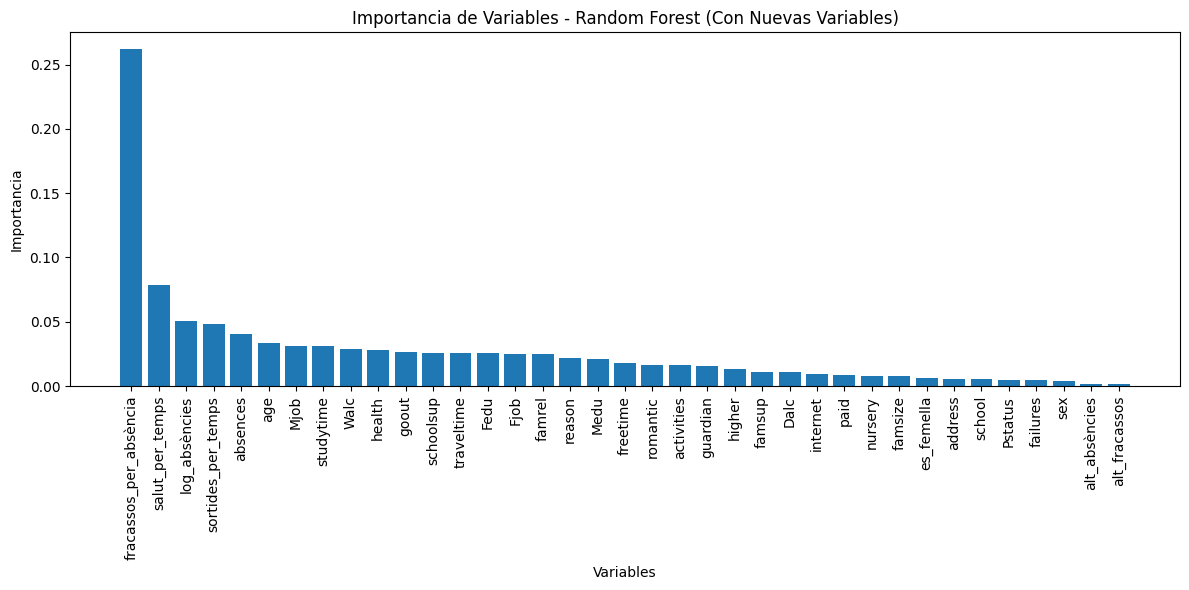

Top 10 Variables más Importantes (Nuevas Variables):
                 Variable  Importancia
0  fracassos_per_absència     0.261974
1         salut_per_temps     0.078836
2           log_absències     0.050694
3      sortides_per_temps     0.048309
4                absences     0.040856
5                     age     0.033501
6                    Mjob     0.031559
7               studytime     0.031463
8                    Walc     0.028641
9                  health     0.028405


In [50]:
# Crear una copia del dataset original
df_extended = df.copy()

# Crear nuevas variables
df_extended['fracassos_per_absència'] = df_extended['failures'] / (df_extended['absences'] + 1)  # Evitar división por cero
df_extended['sortides_per_temps'] = df_extended['goout'] / (df_extended['freetime'] + 1)
df_extended['es_femella'] = (df_extended['sex'] == 1).astype(int)  # Sexo binarizado
df_extended['alt_fracassos'] = (df_extended['failures'] > 0).astype(int)
df_extended['alt_absències'] = (df_extended['absences'] > 10).astype(int)
df_extended['salut_per_temps'] = df_extended['health'] * df_extended['freetime']
df_extended['log_absències'] = np.log1p(df_extended['absences'])  # Logaritmo de absencias para normalizar

# Verificar nuevas columnas
print("Nuevas columnas añadidas al dataset:\n", df_extended.head())

# Variables predictoras y objetivo
X_new = df_extended.drop(columns=['G3','G2','G1'])  # Variables predictoras
y_new = df_extended['G3']  # Variable objetivo

# Dividir los datos en entrenamiento y prueba (nuevas variables)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Escalar las variables predictoras (nuevas variables)
scaler = StandardScaler()
X_train_scaled_new = scaler.fit_transform(X_train_new)
X_test_scaled_new = scaler.transform(X_test_new)

# Entrenar el modelo Random Forest
rf_model_new = RandomForestRegressor(n_estimators=150, max_depth=20, random_state=42)
rf_model_new.fit(X_train_scaled_new, y_train_new)

# Obtener la importancia de las variables
importances_new = rf_model_new.feature_importances_
feature_names_new = X_new.columns

# Ordenar las variables por importancia
sorted_indices_new = np.argsort(importances_new)[::-1]

# Visualizar la importancia de las variables
plt.figure(figsize=(12, 6))
plt.title("Importancia de Variables - Random Forest (Con Nuevas Variables)")
plt.bar(range(X_new.shape[1]), importances_new[sorted_indices_new], align="center")
plt.xticks(range(X_new.shape[1]), feature_names_new[sorted_indices_new], rotation=90)
plt.ylabel("Importancia")
plt.xlabel("Variables")
plt.tight_layout()
plt.show()

# Mostrar las 10 variables más importantes
important_features_new = pd.DataFrame({
    'Variable': feature_names_new[sorted_indices_new],
    'Importancia': importances_new[sorted_indices_new]
})

print("Top 10 Variables más Importantes (Nuevas Variables):")
print(important_features_new.head(10))


Evaluación del Modelo Random Forest (Con Nuevas Variables y Validación Cruzada):
MAE Promedio: 2.8980
R² Promedio: 0.2856


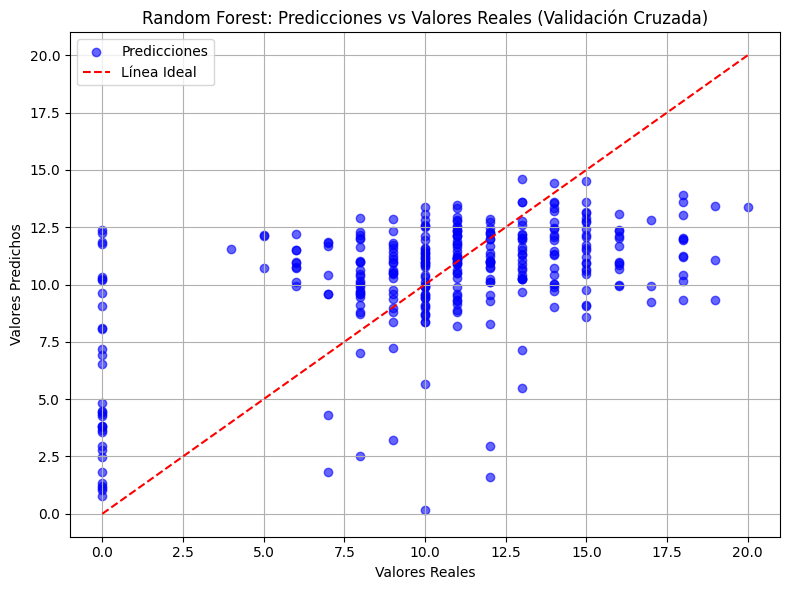

In [51]:
# Entrenar Random Forest con validación cruzada
rf_model_new = RandomForestRegressor(n_estimators=150, max_depth=20, random_state=1)

# Realizar validación cruzada
cv_scores_mae = -cross_val_score(rf_model_new, X_train_scaled_new, y_train_new, cv=5, scoring='neg_mean_absolute_error')
cv_scores_r2 = cross_val_score(rf_model_new, X_train_scaled_new, y_train_new, cv=5, scoring='r2')

# Promedio de las métricas
mean_mae = np.mean(cv_scores_mae)
mean_r2 = np.mean(cv_scores_r2)

# Predicciones con validación cruzada
y_pred_cv = cross_val_predict(rf_model_new, X_train_scaled_new, y_train_new, cv=5)

# Mostrar métricas
print("Evaluación del Modelo Random Forest (Con Nuevas Variables y Validación Cruzada):")
print(f"MAE Promedio: {mean_mae:.4f}")
print(f"R² Promedio: {mean_r2:.4f}")

# Gráfico de predicciones vs valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_train_new, y_pred_cv, alpha=0.6, label='Predicciones', color='blue')
plt.plot([y_train_new.min(), y_train_new.max()], [y_train_new.min(), y_train_new.max()], color='red', linestyle='--', label='Línea Ideal')
plt.title("Random Forest: Predicciones vs Valores Reales (Validación Cruzada)")
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


MEJORA 0.2 EN MAE Y 0.1 MAS EN R2

Aunque la mejora pueda parecer pequeña en términos absolutos, refleja una mayor precisión del modelo.
La reducción en el MAE significa que el error de predicción promedio disminuyó, lo cual es crucial en problemas donde cada punto en la calificación cuenta.
El incremento en R² muestra que el modelo es ahora más confiable para explicar la variabilidad de los datos.